In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('housetrain.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
df.shape

(1168, 81)

In [4]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

# Summary Statistics

In [7]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

Observations :-

1. Mean is more than median for SalePrice, MoSold, MiscVal, PoolArea, ScreenPorch, 3SsnPorch, EnclosedPorch, OpenPorchSF,
WoodDeckSF, BsmtFinSF1, MasVnrArea, YearRemodAdd, OverallCond, OverallQual, LotArea, LotFrontage, MSSubClass and Id Column.
2. There is large difference between 75% and maximum for Price column.

# Exploring Target Variable

In [8]:
df['SalePrice'].value_counts()

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
126175     1
204000     1
186000     1
369900     1
105500     1
Name: SalePrice, Length: 581, dtype: int64

In [9]:
# As we have continuos values in Price column, so, this is a regression problem.

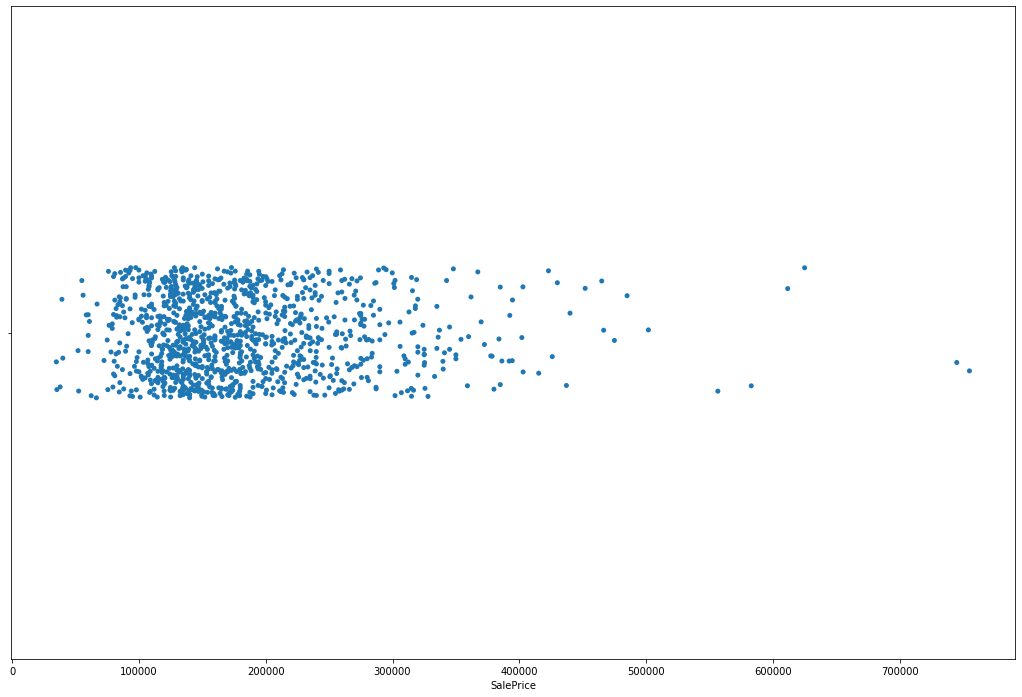

In [10]:
plt.figure(figsize=(18,12))
sns.stripplot(df['SalePrice'])

Observations :-

1. Sales Prices are majorly in the range of 100000-200000.

# Data Visualizations

To check missing values

In [11]:
pd.set_option('display.max_rows',100)
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

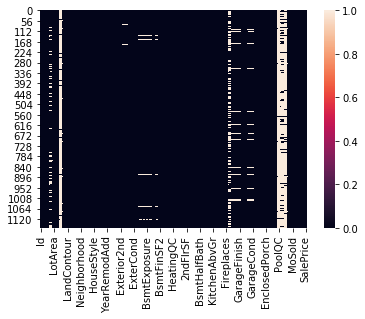

In [12]:
sns.heatmap(df.isnull())

Observations :-
    
1. LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence and MiscFeature have null values.

In [13]:
df_object_list=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_object_list.append(i)

In [14]:
for i in df_object_list:
    df[i]=df[i].fillna(df[i].mode()[0])

In [15]:
df_int_types=[]
for i in df.columns:
    if df[i].dtypes == "int64":
        df_int_types.append(i)

In [16]:
for i in df_int_types:
    df[i]=df[i].fillna(df[i].mean())

In [17]:
df_float_types=[]
for i in df.columns:
    if df[i].dtypes == "float64":
        df_float_types.append(i)

In [18]:
df_float_types

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [19]:
for i in df_float_types:
    df[i]=df[i].fillna(df[i].mean())

In [20]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

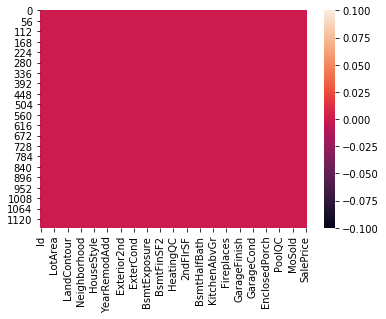

In [21]:
sns.heatmap(df.isnull())

Obsevations :-

1. The data has no missing values.

# Univariate Analysis

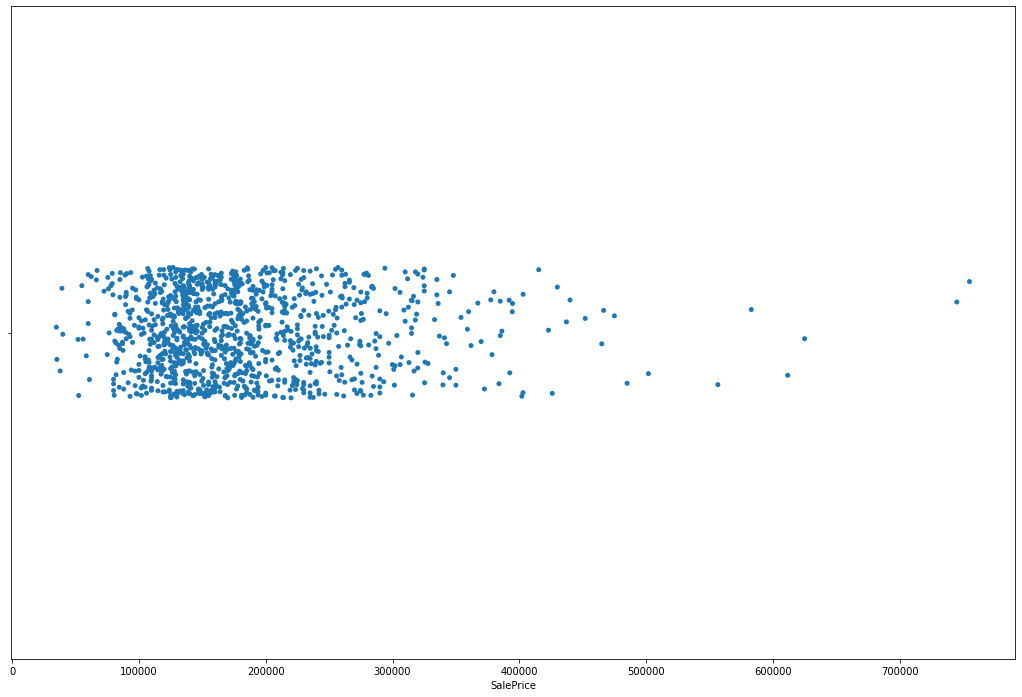

In [22]:
plt.figure(figsize=(18,12))
sns.stripplot(df['SalePrice'])

Observations :-
    
1. Majorly Sales Price are between 100000 and 200000.

# Bivariate Analysis

In [23]:
df_str_types=[]
for i in df.columns:
    if df[i].dtypes == "object":
        df_str_types.append(i)

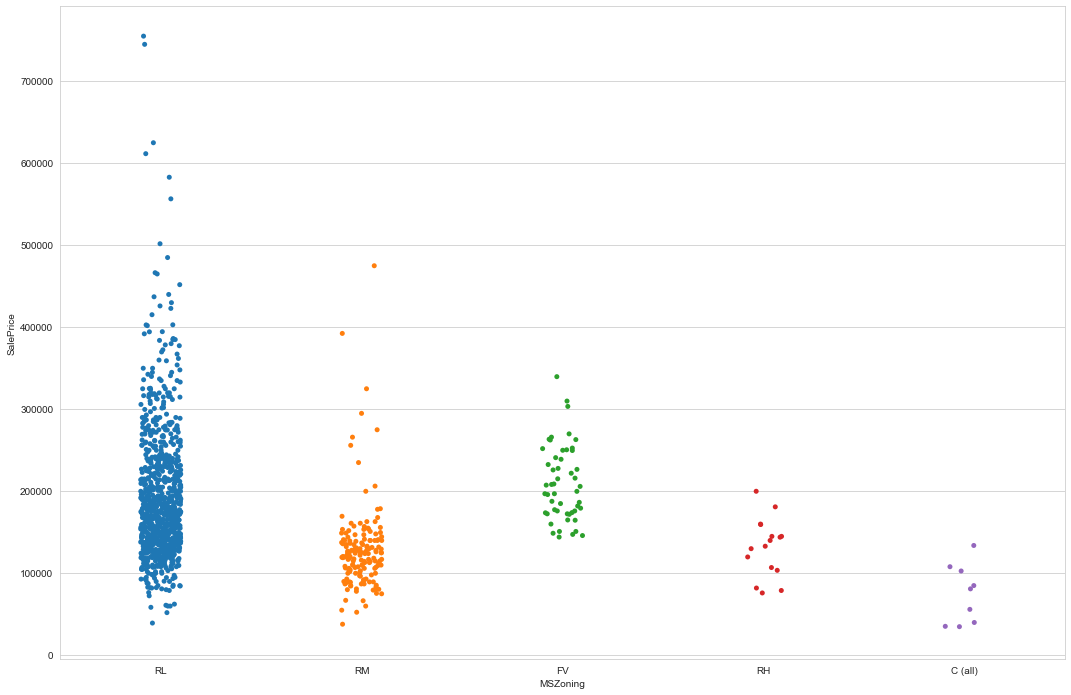

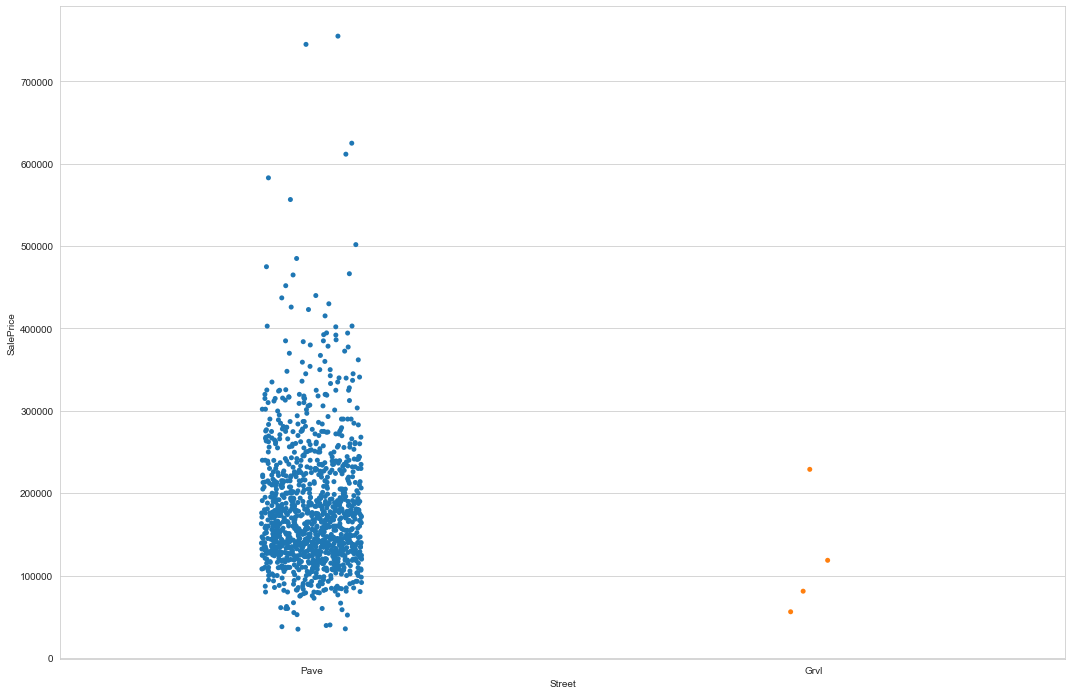

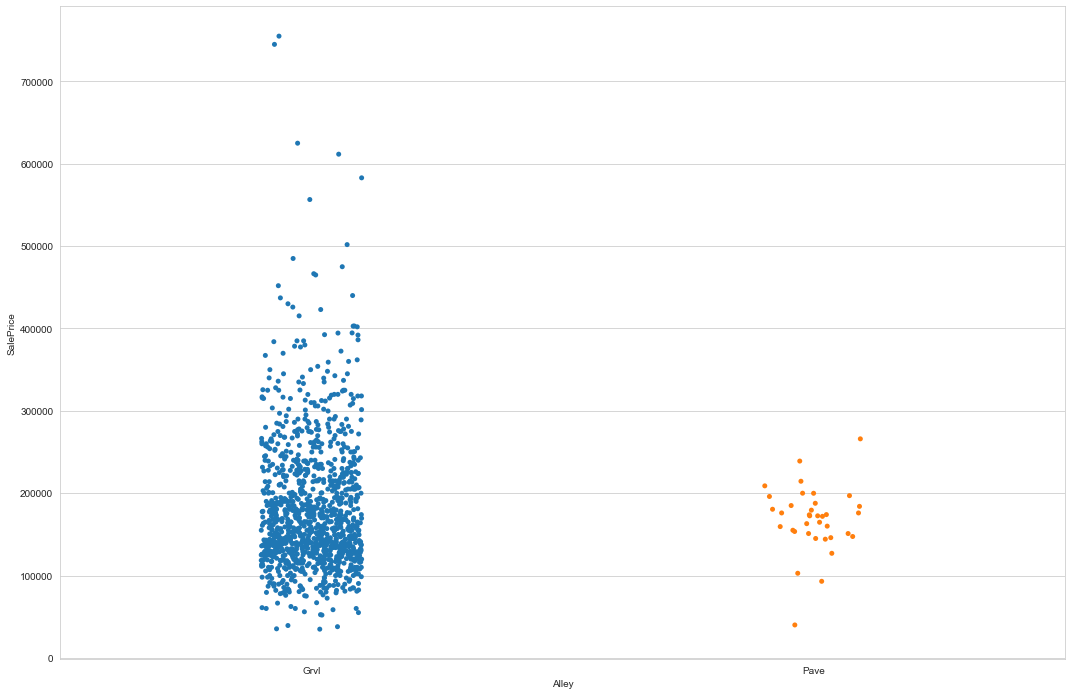

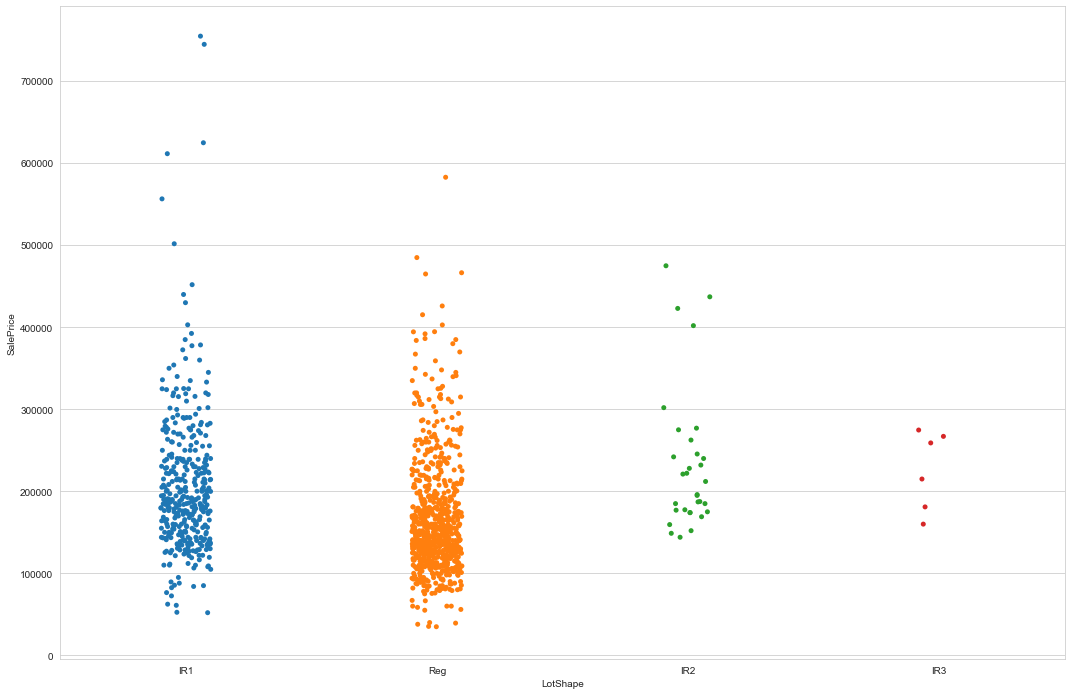

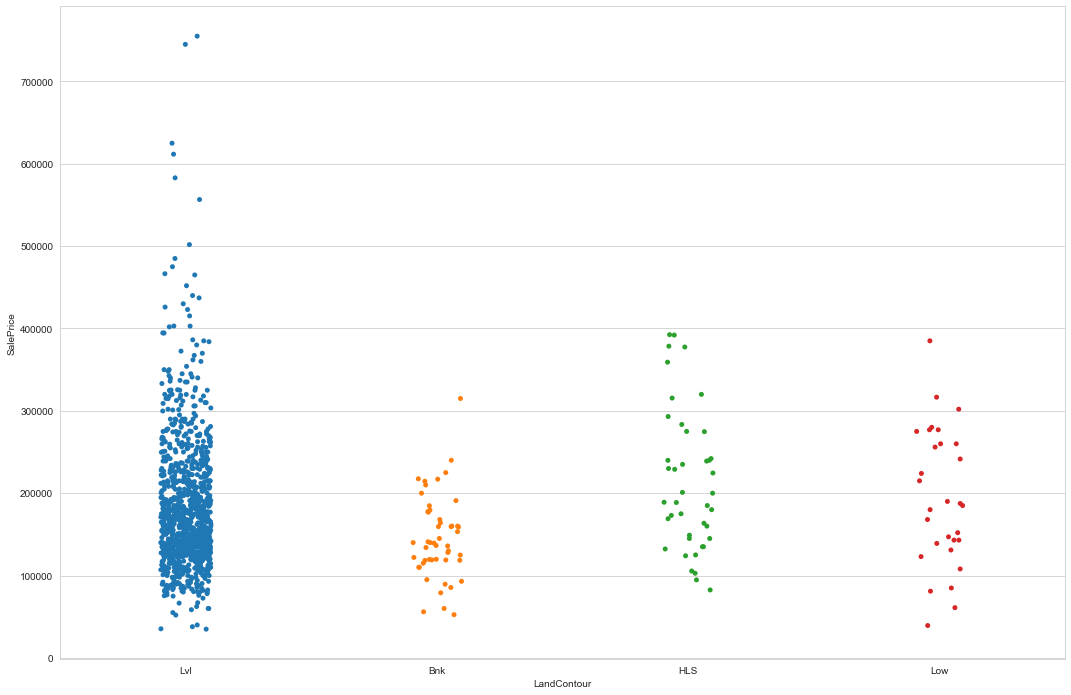

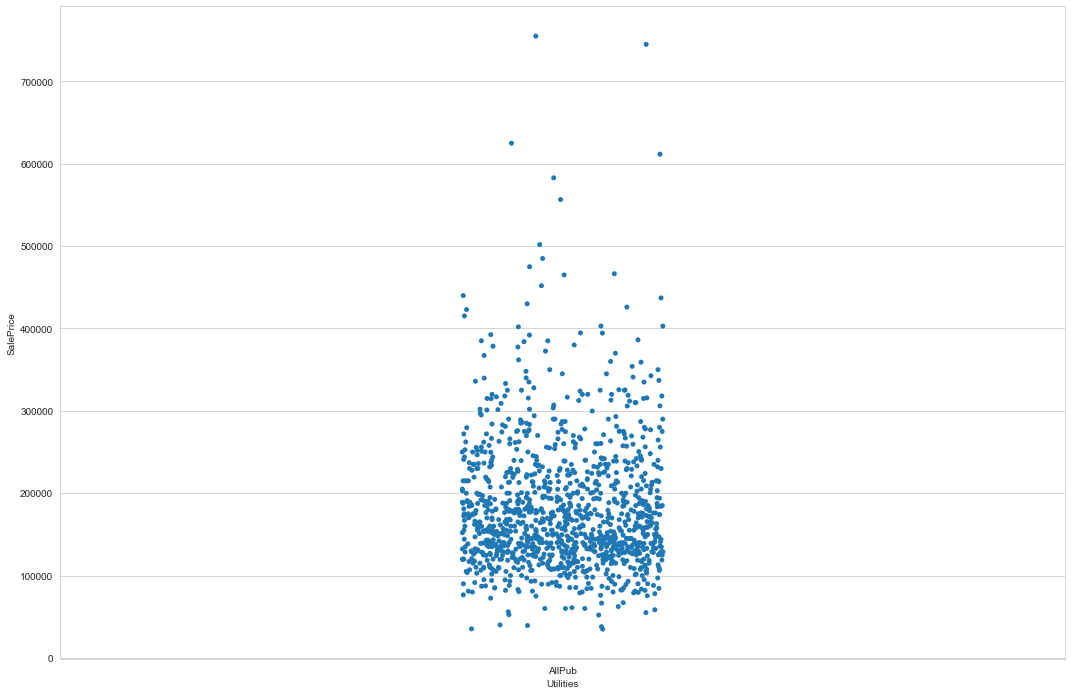

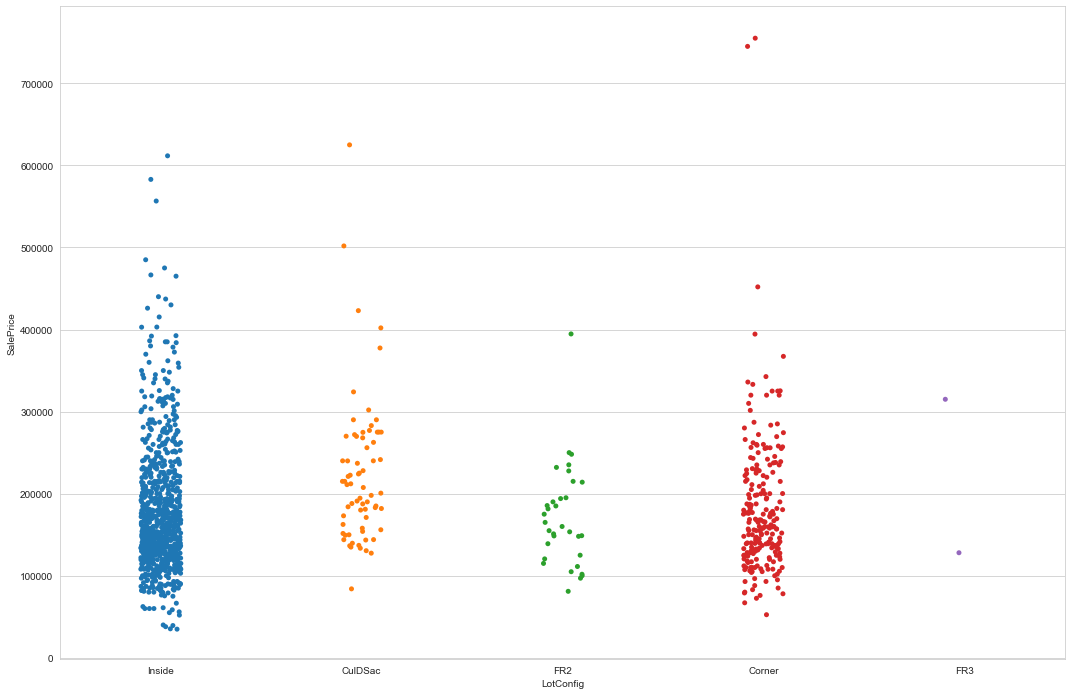

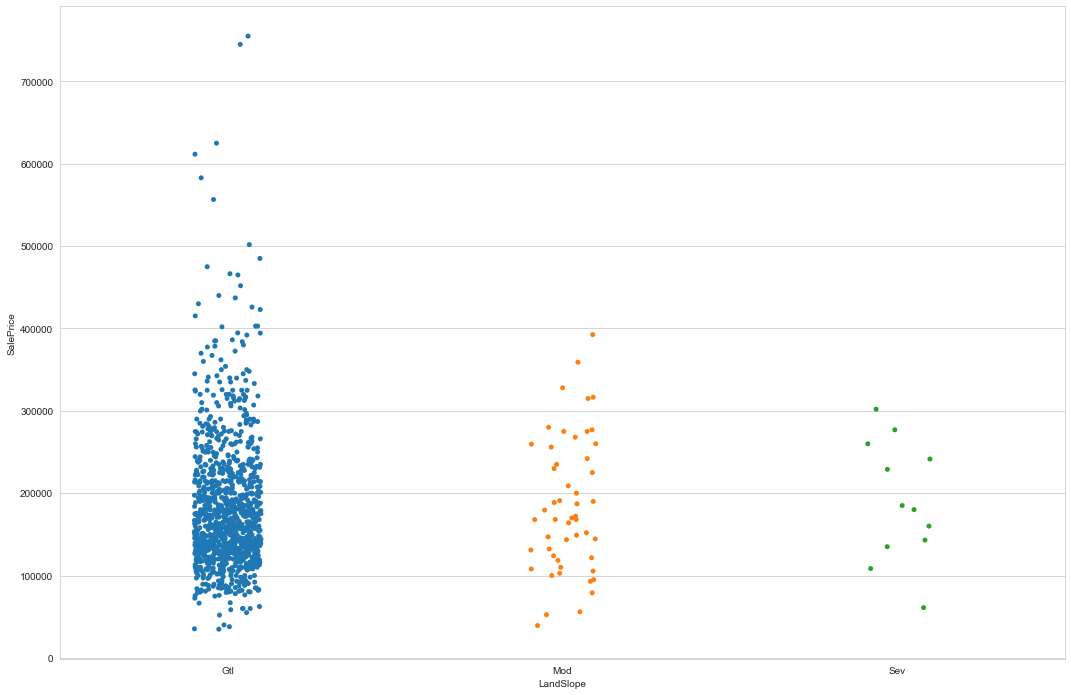

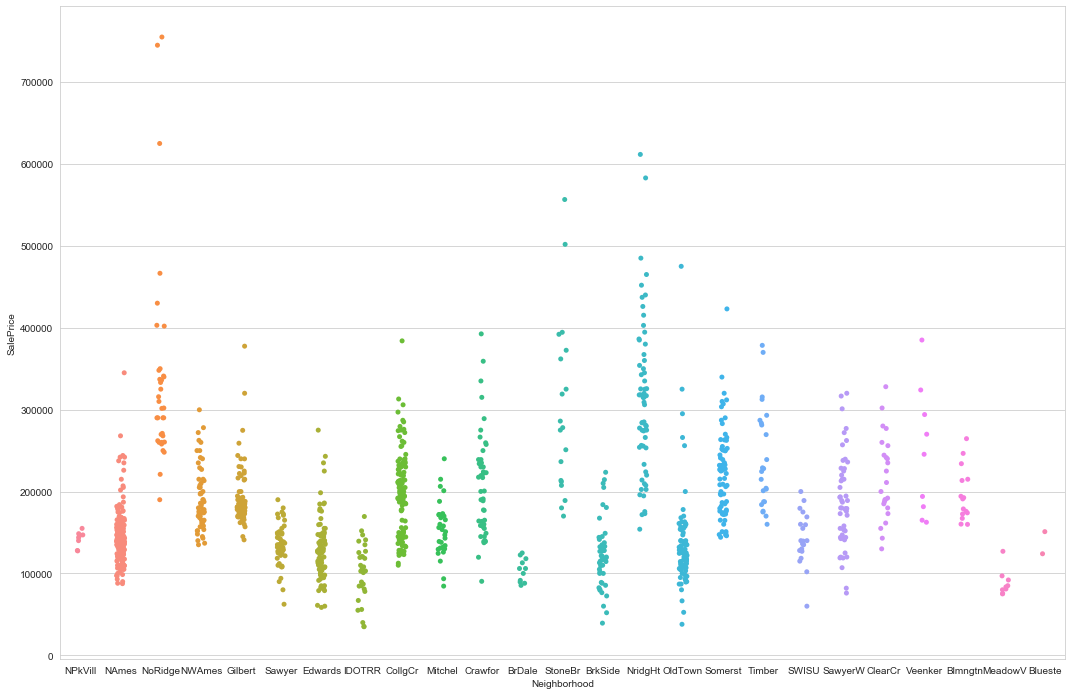

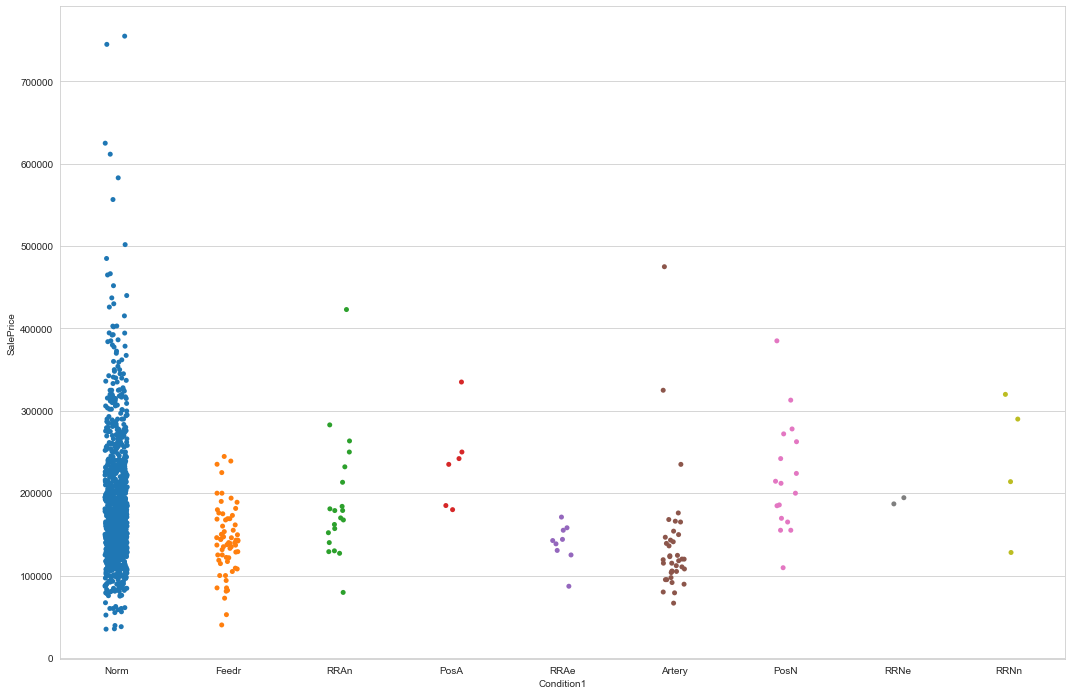

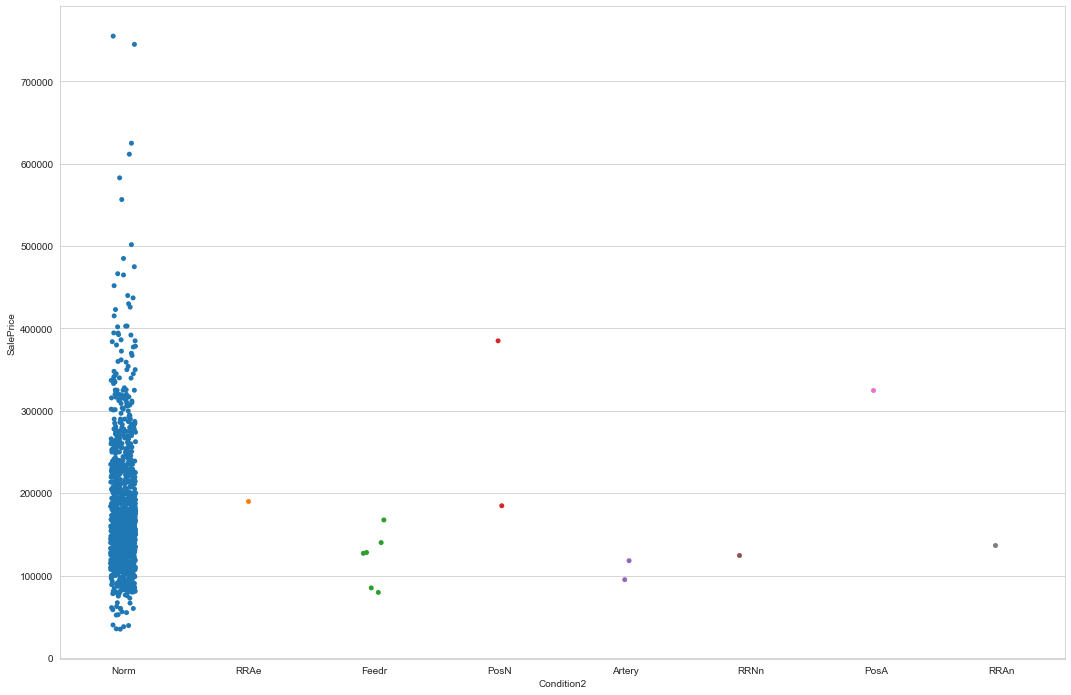

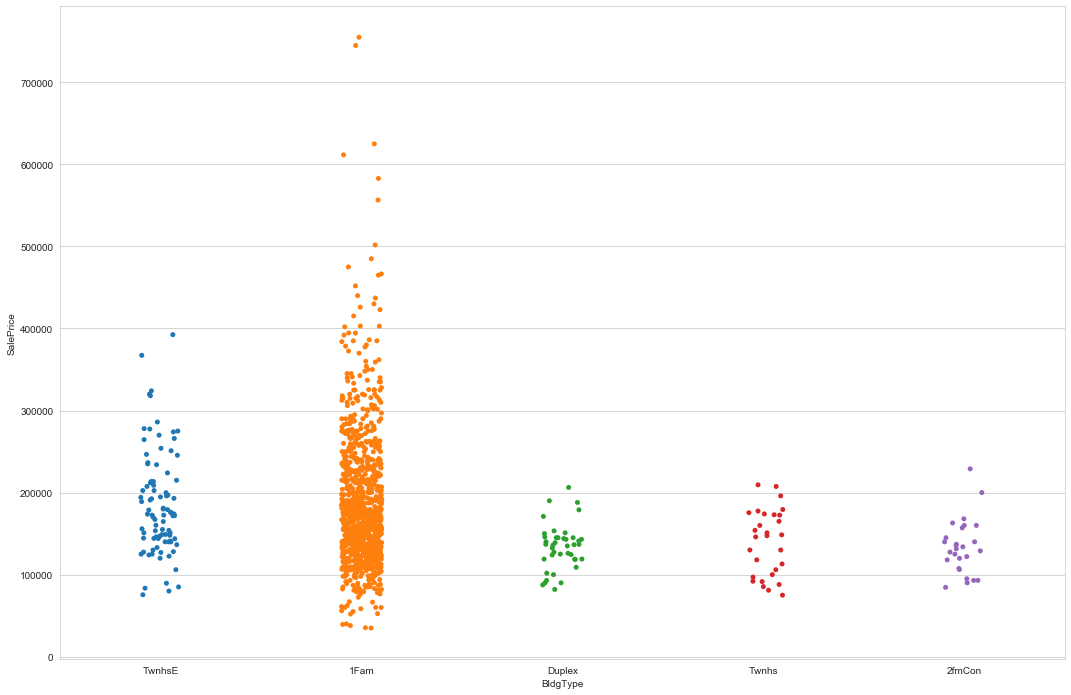

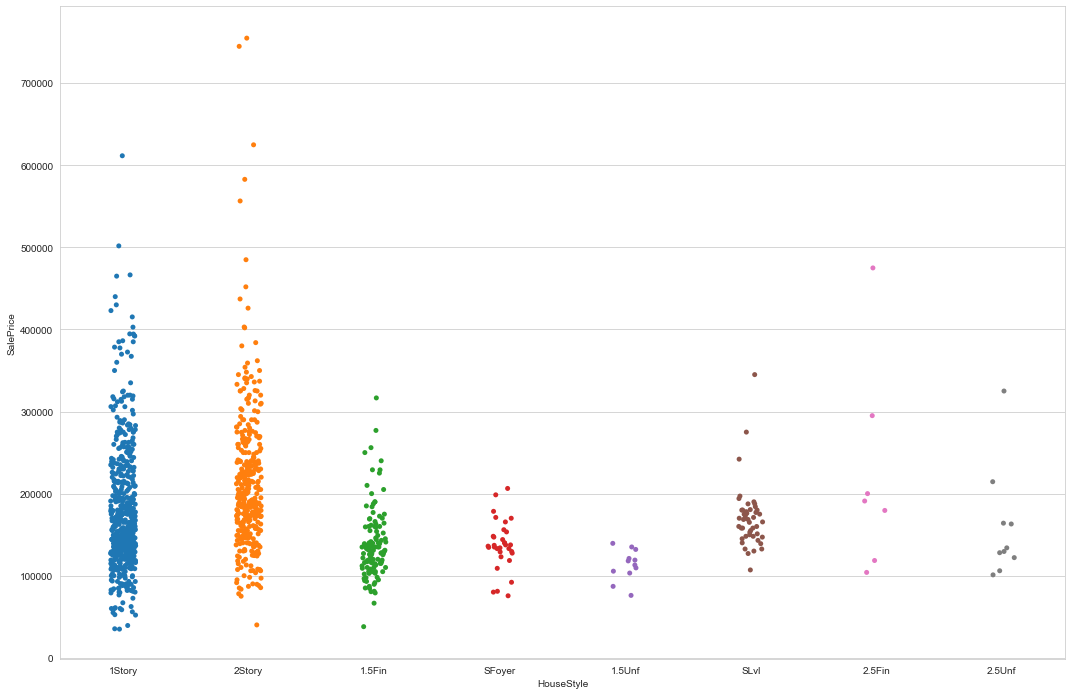

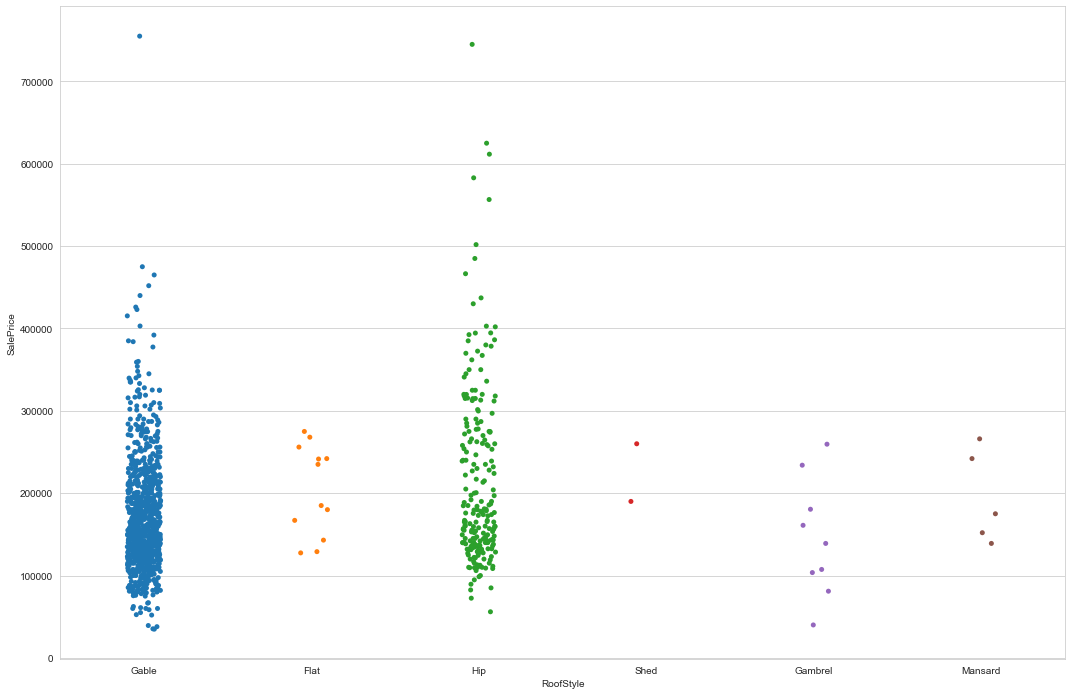

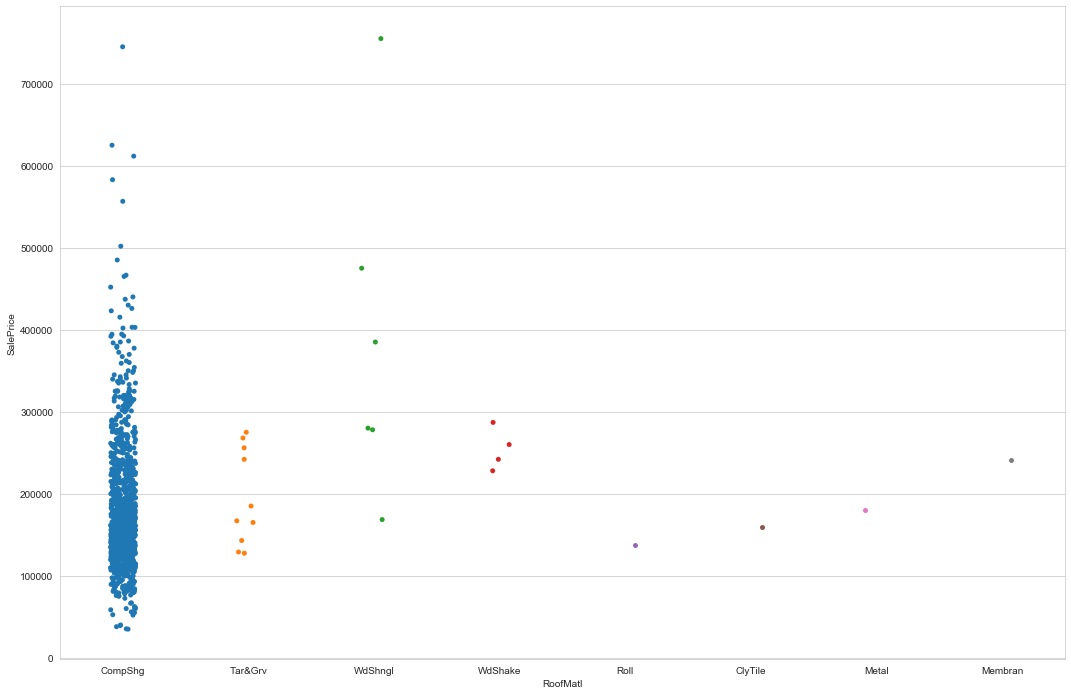

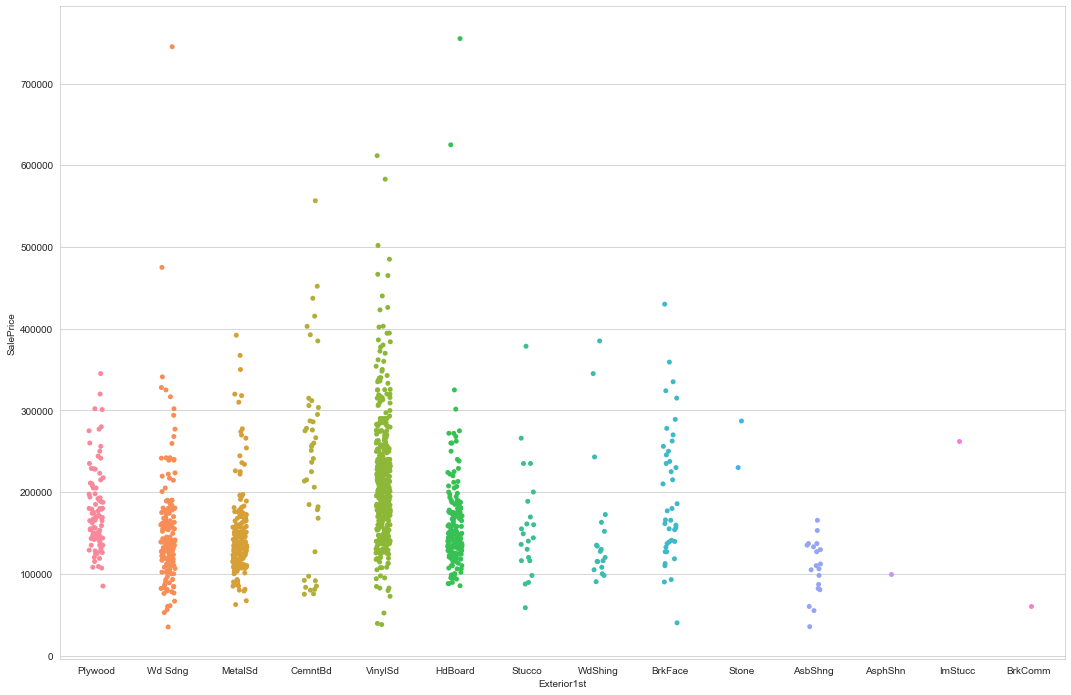

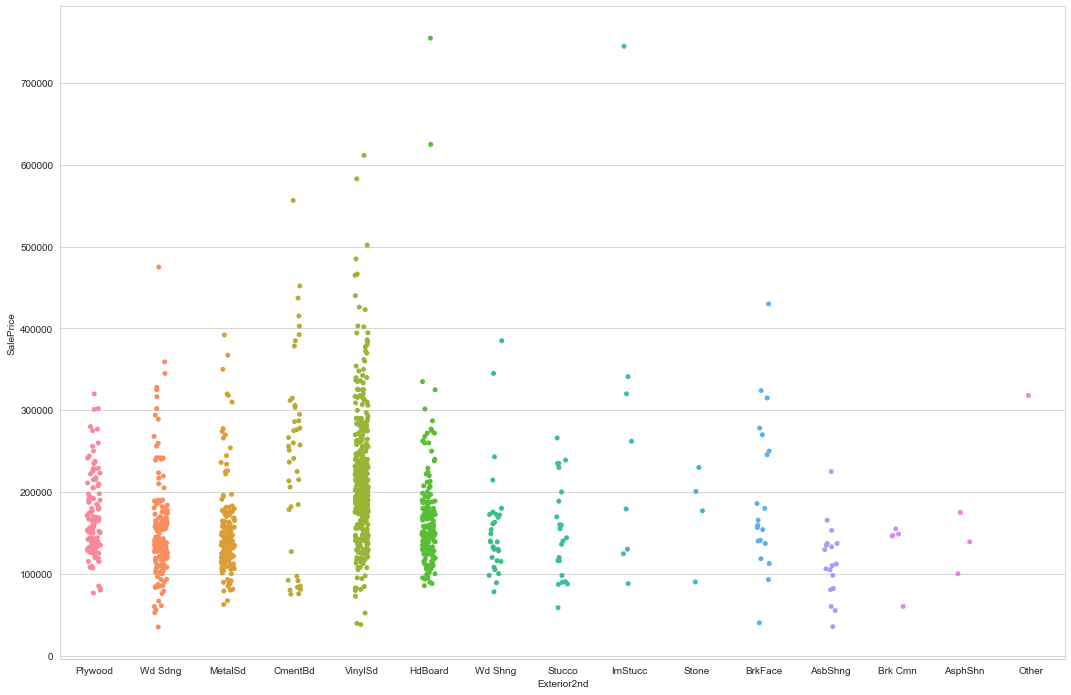

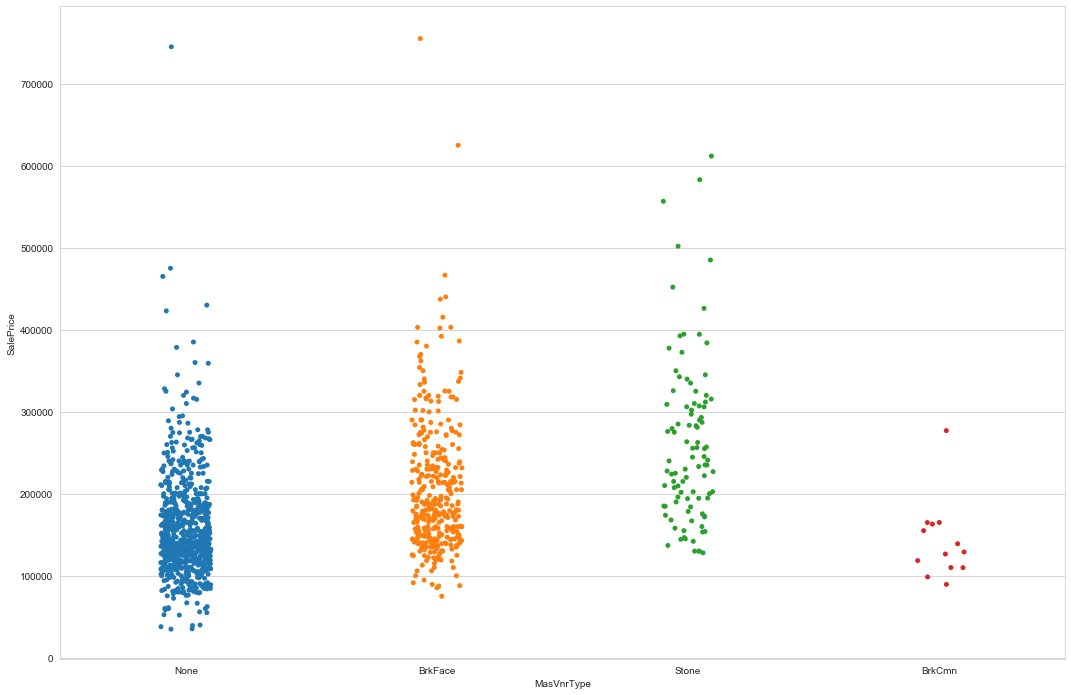

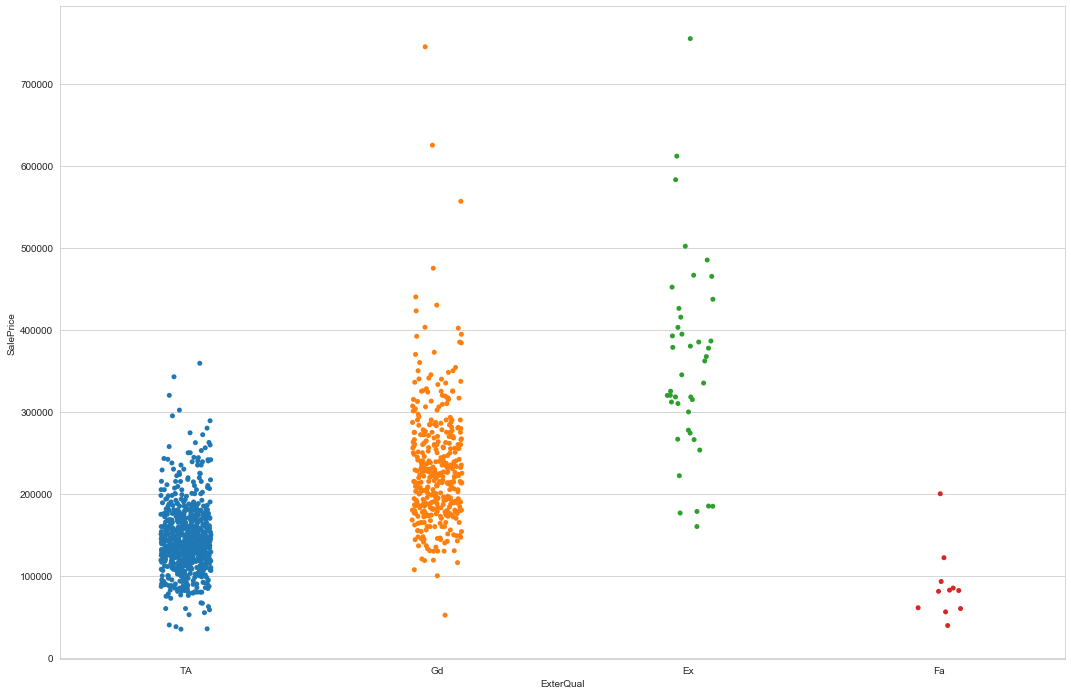

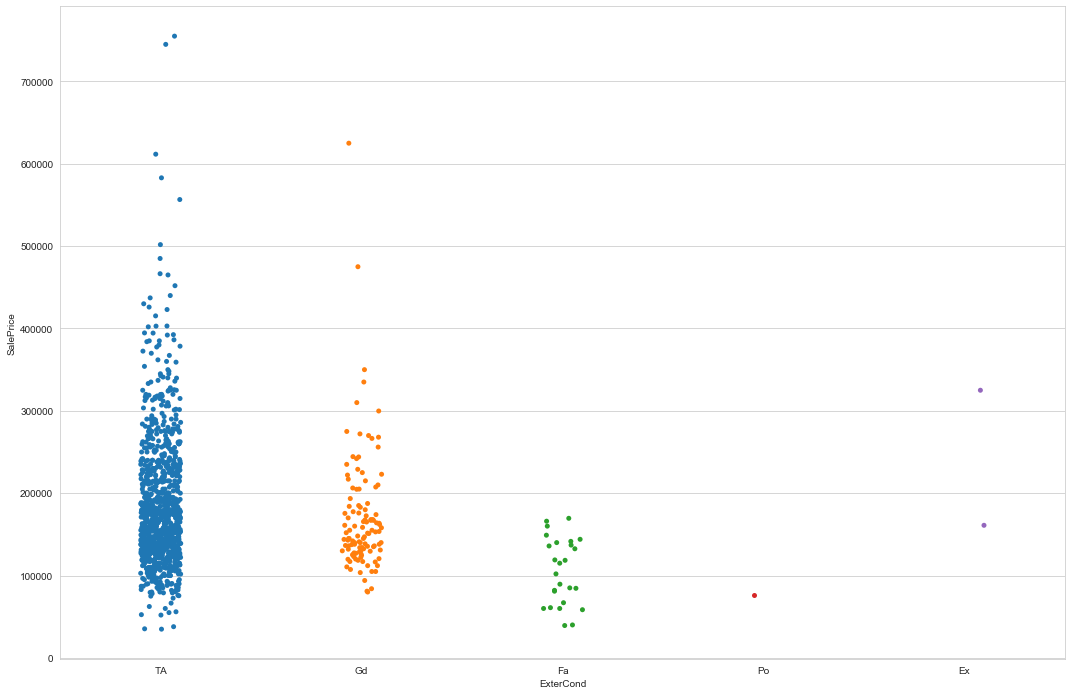

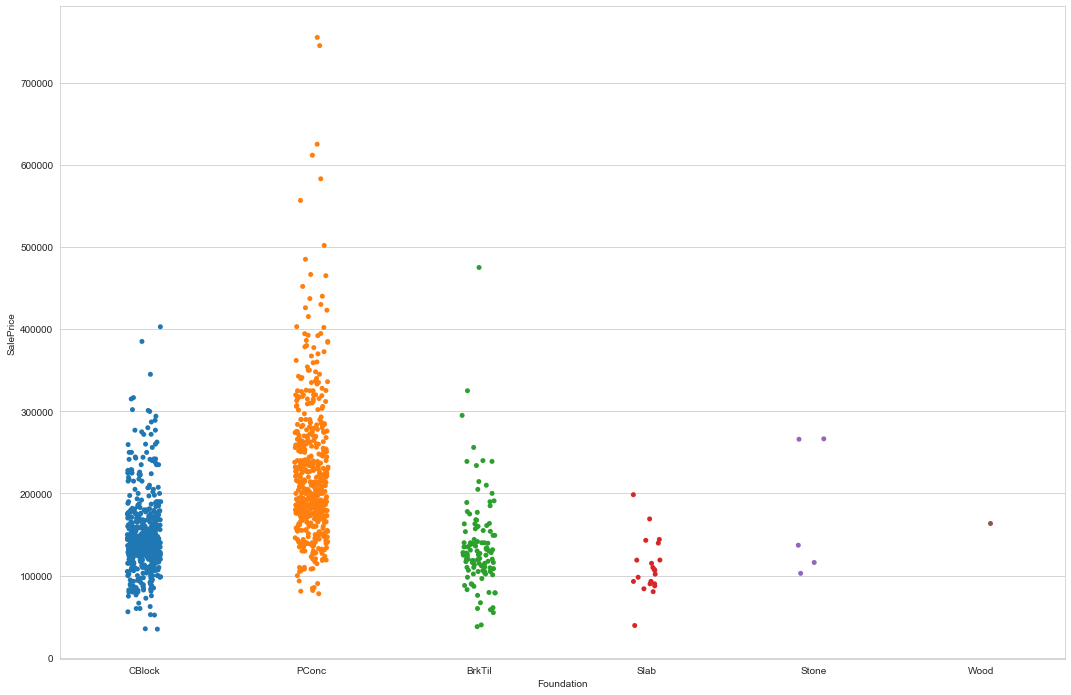

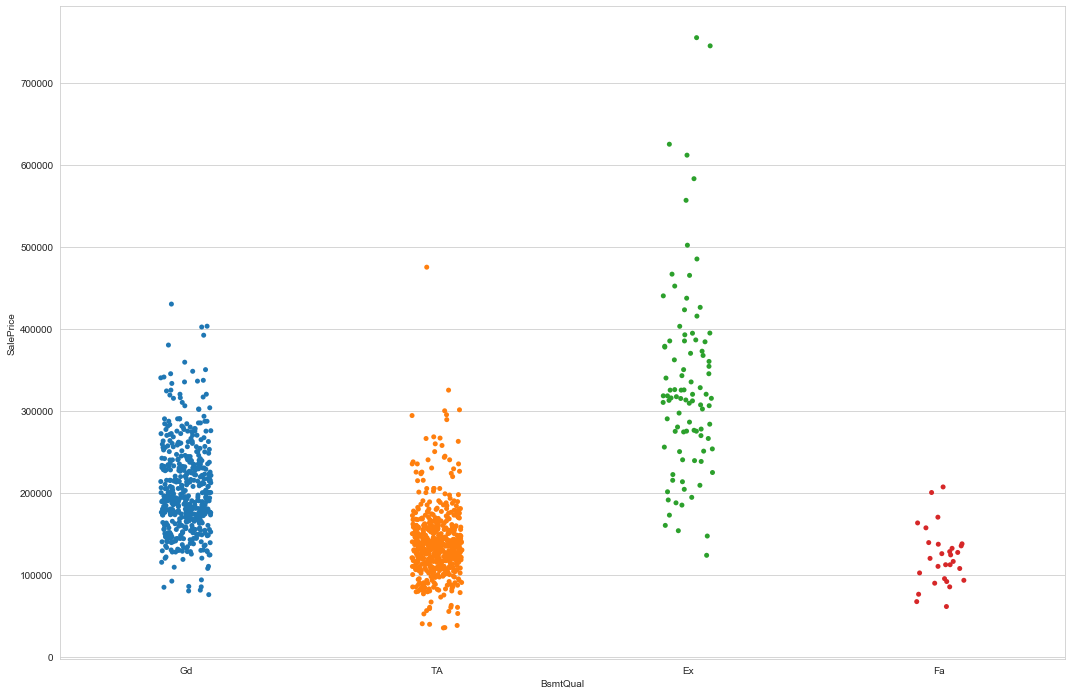

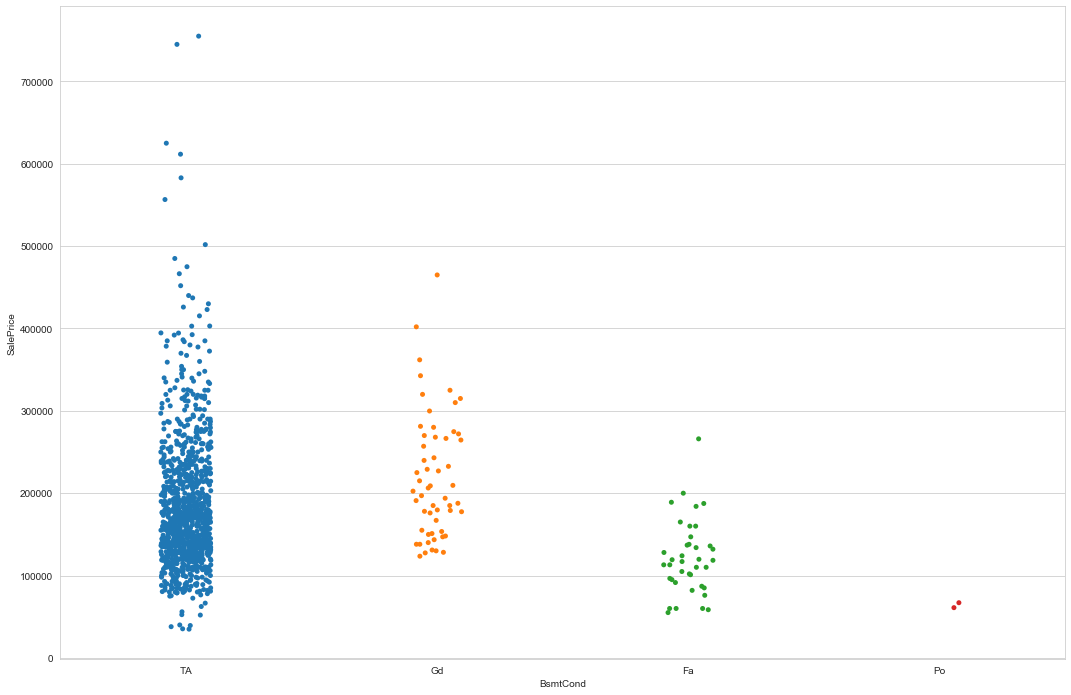

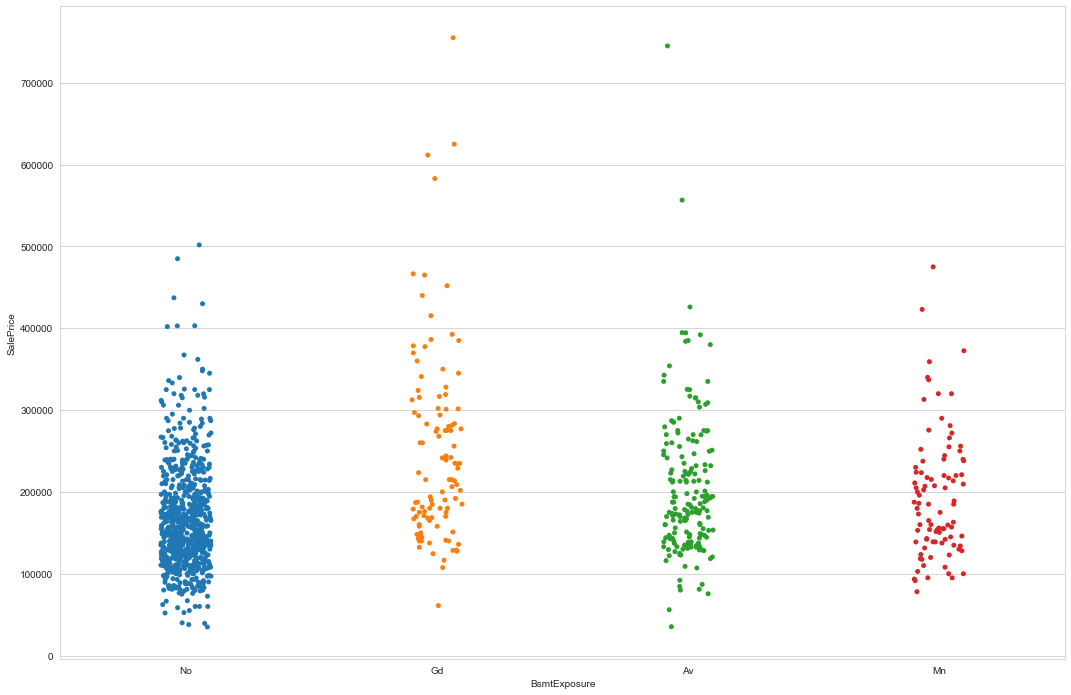

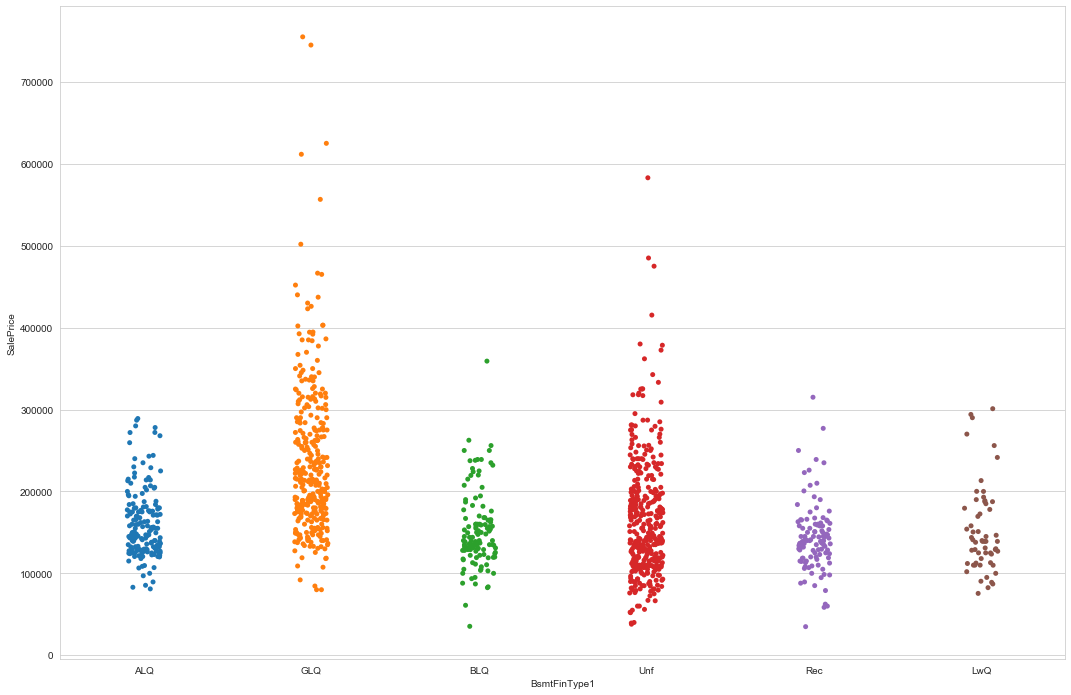

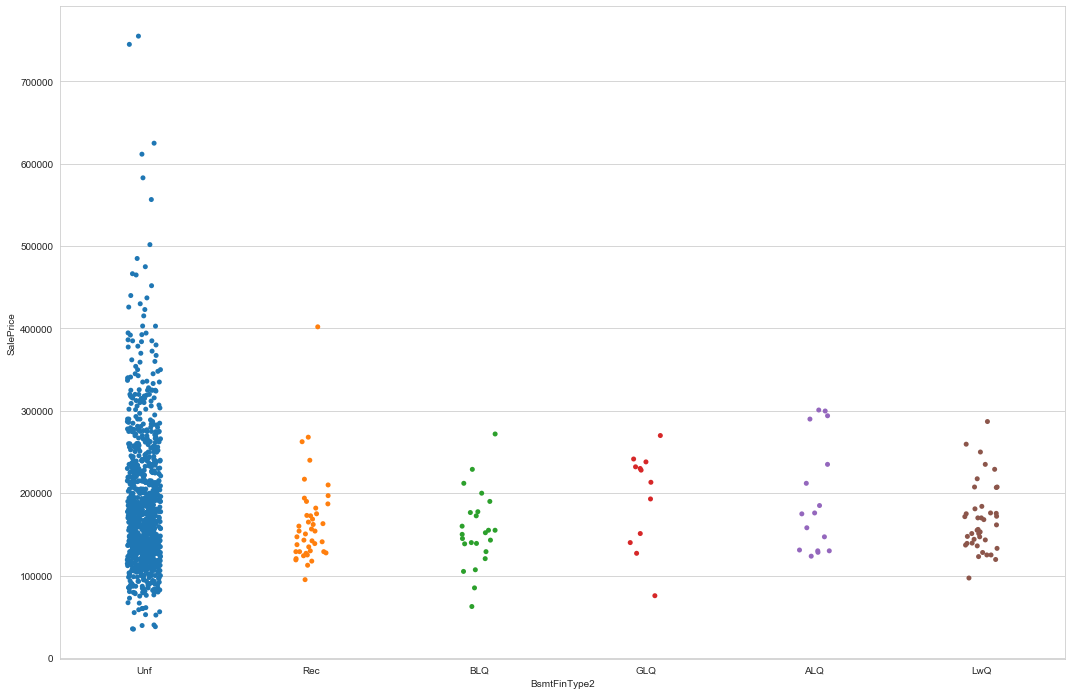

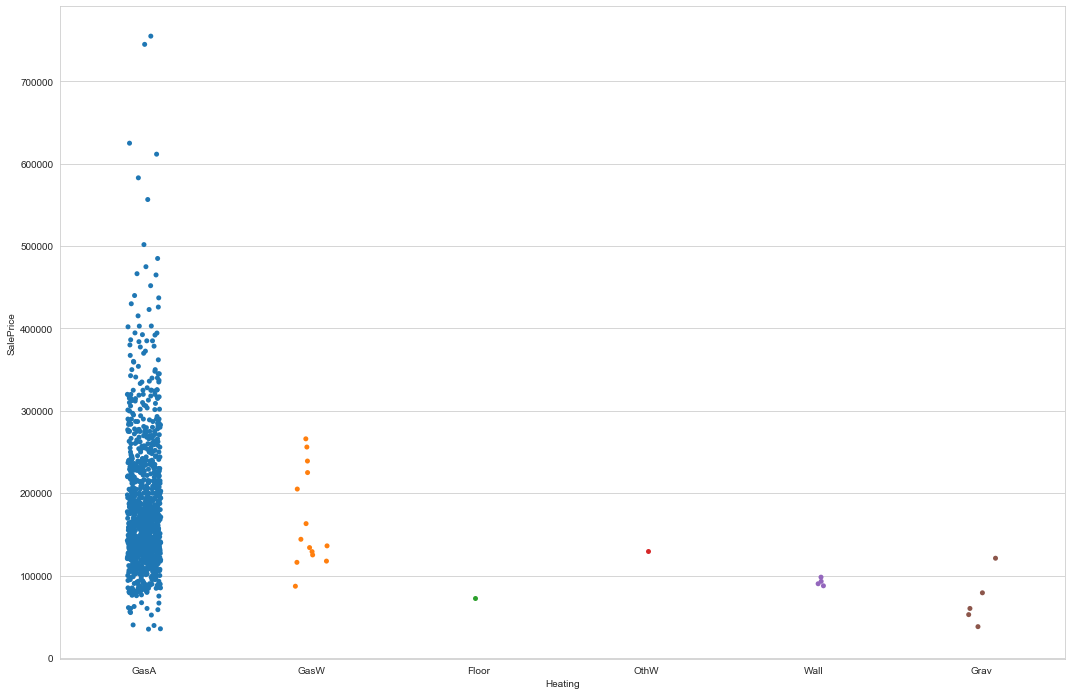

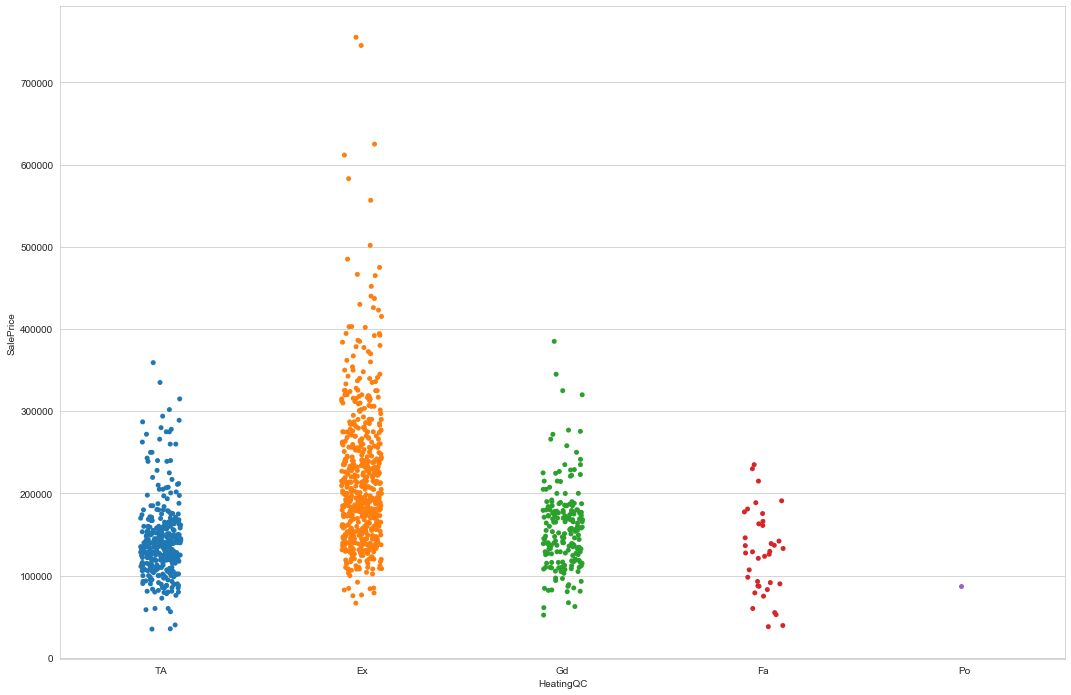

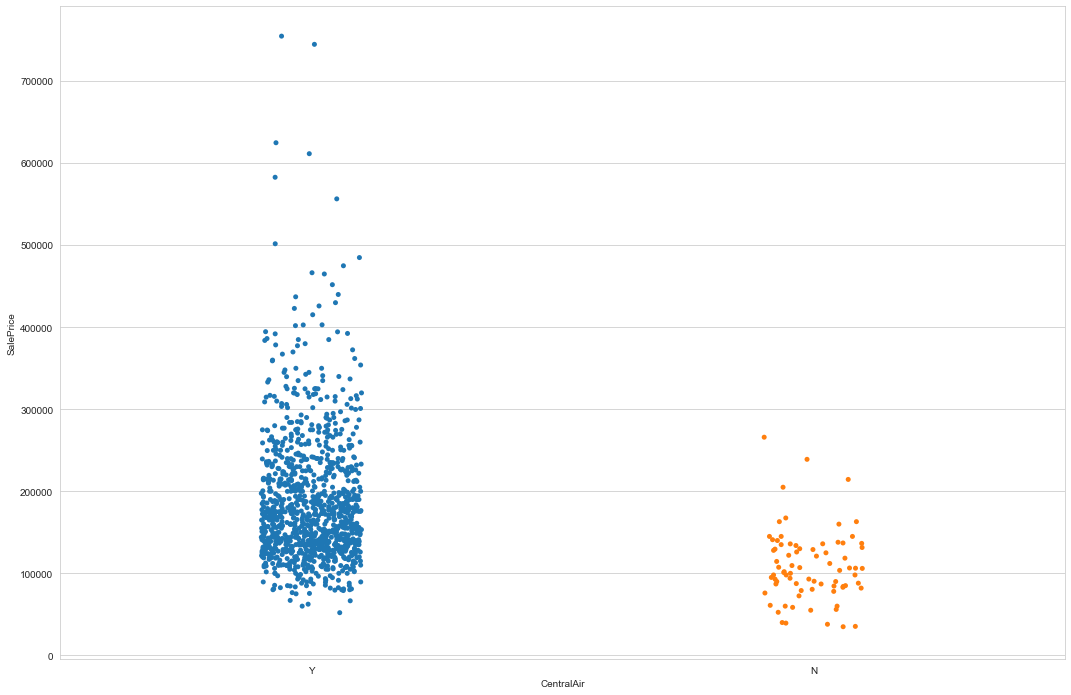

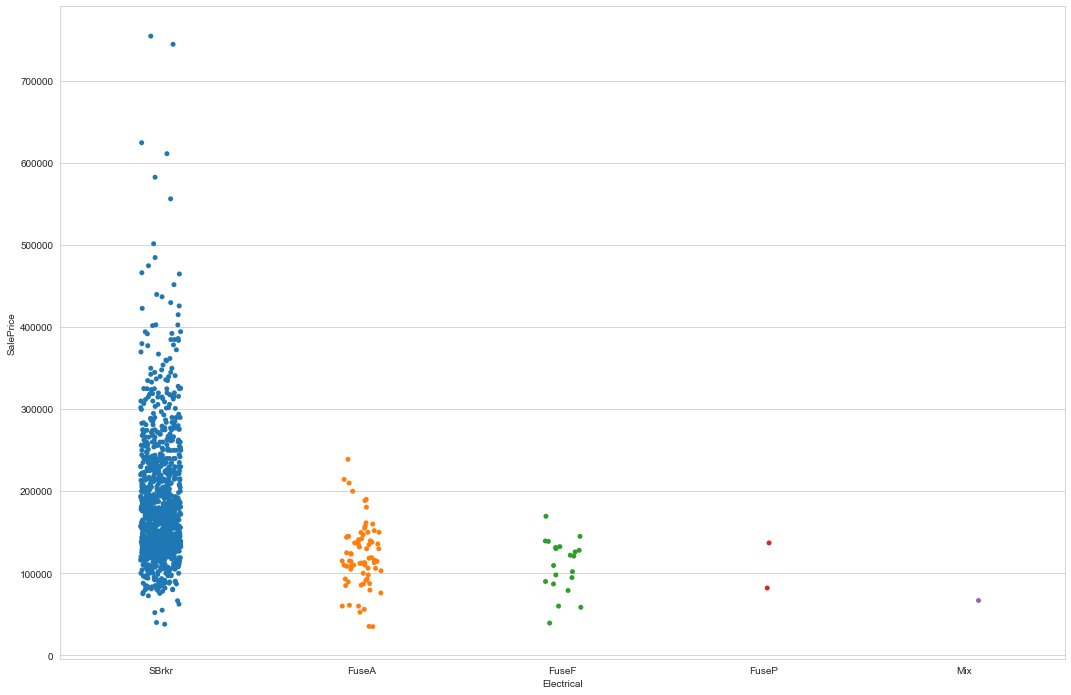

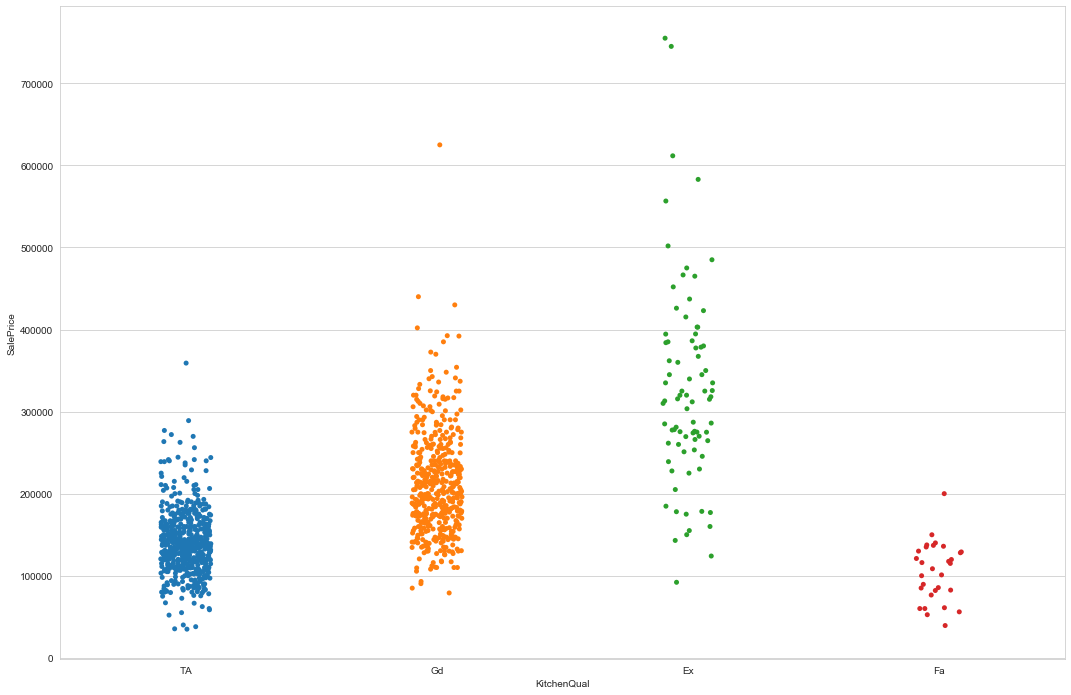

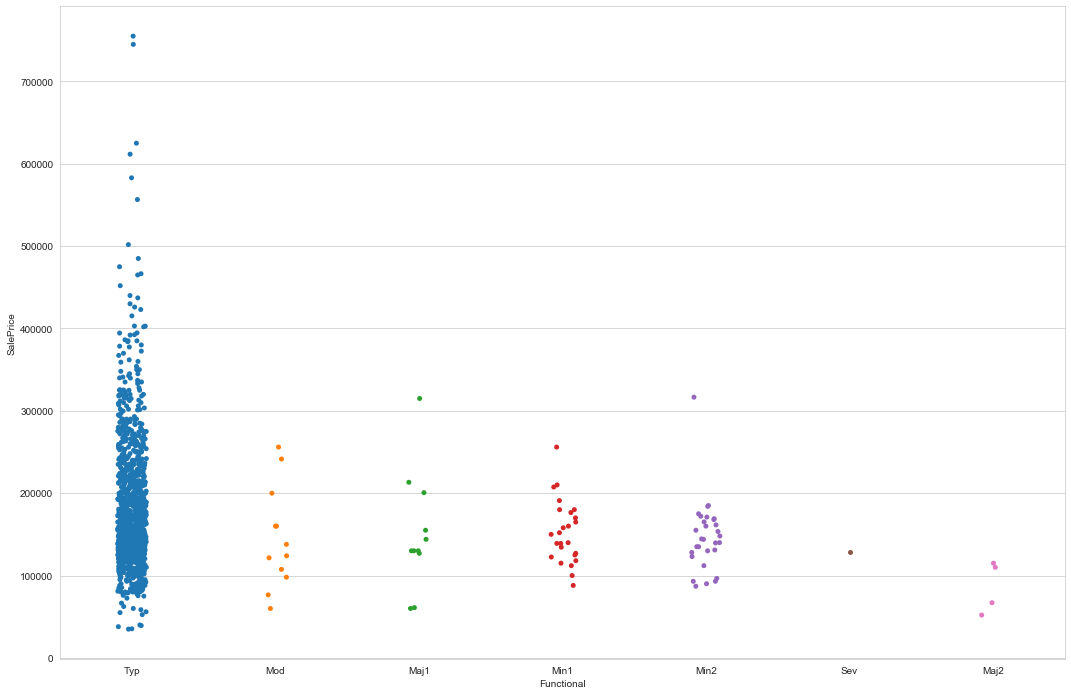

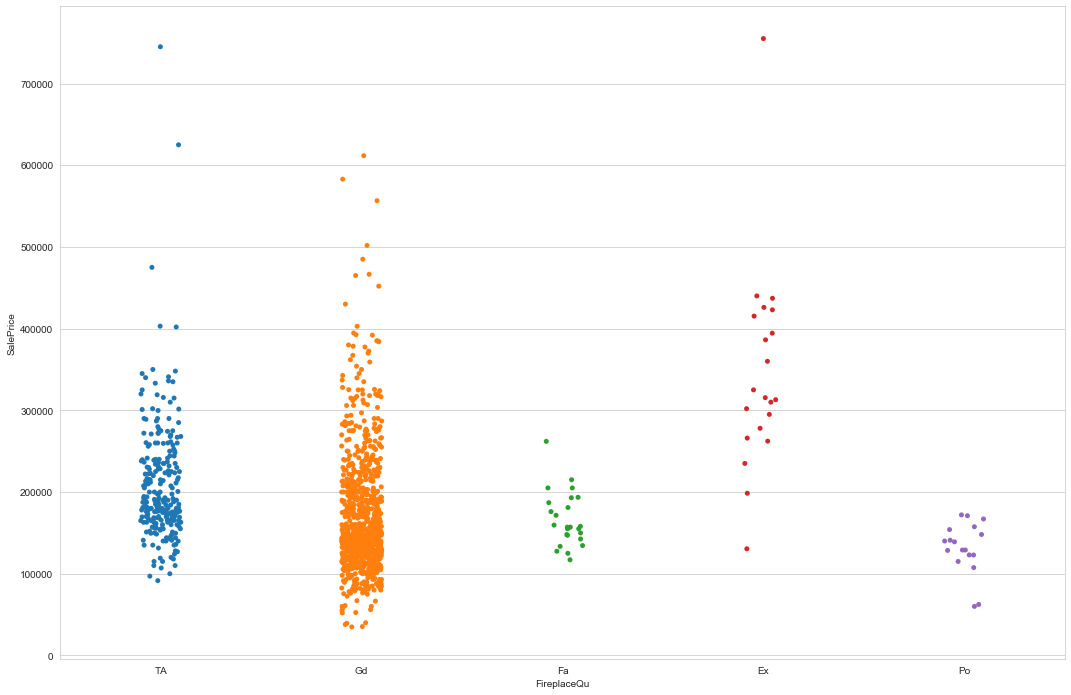

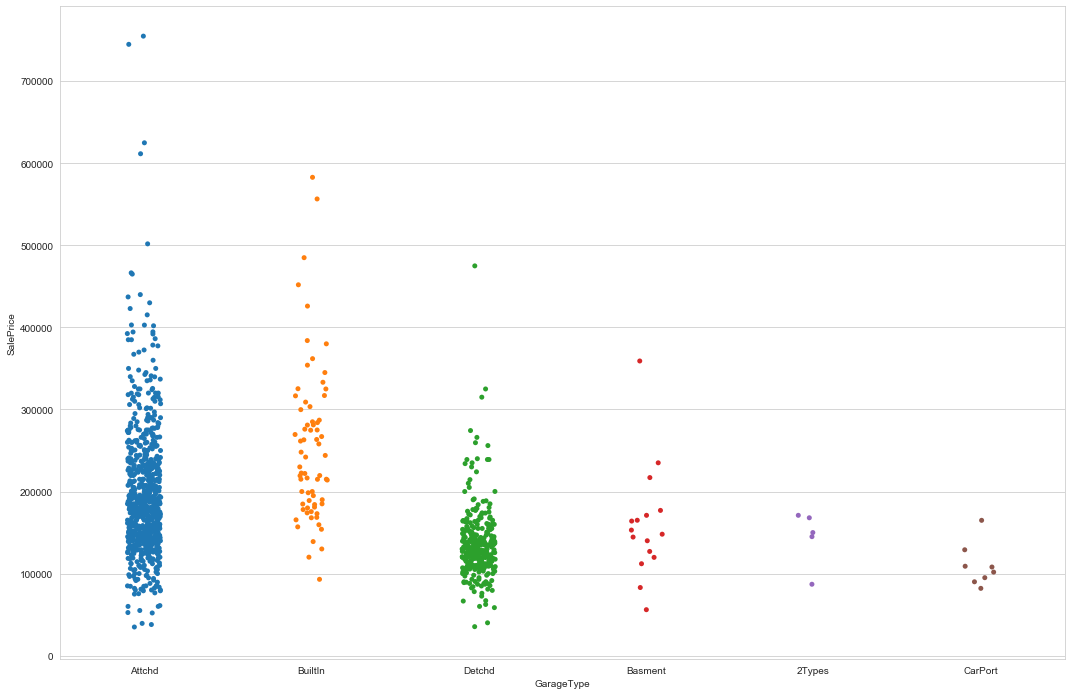

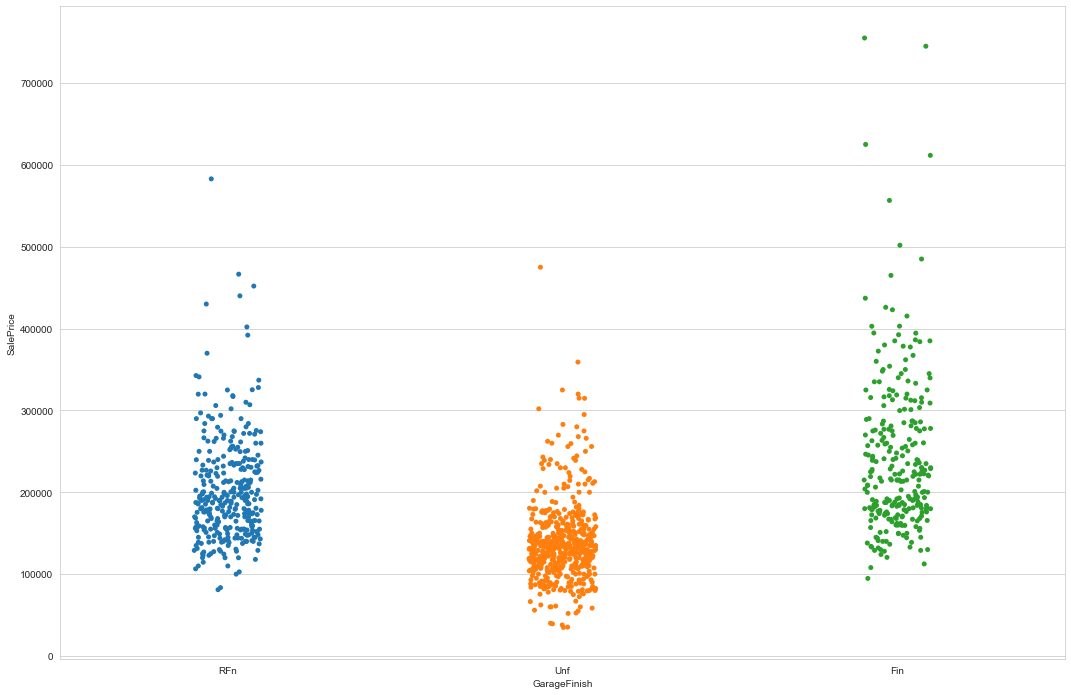

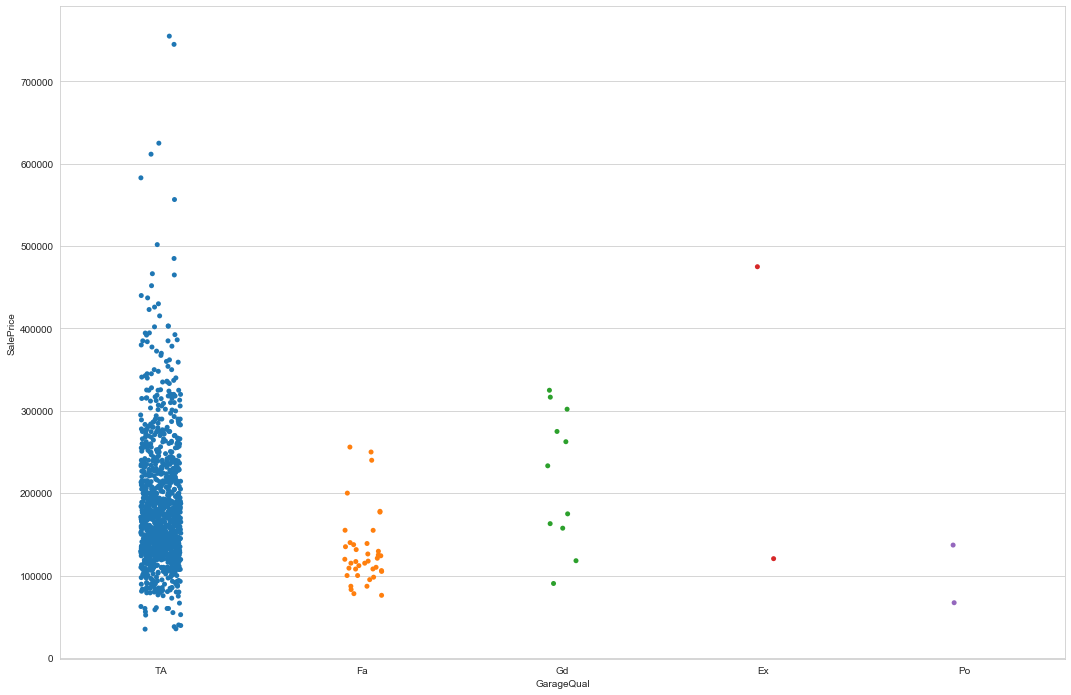

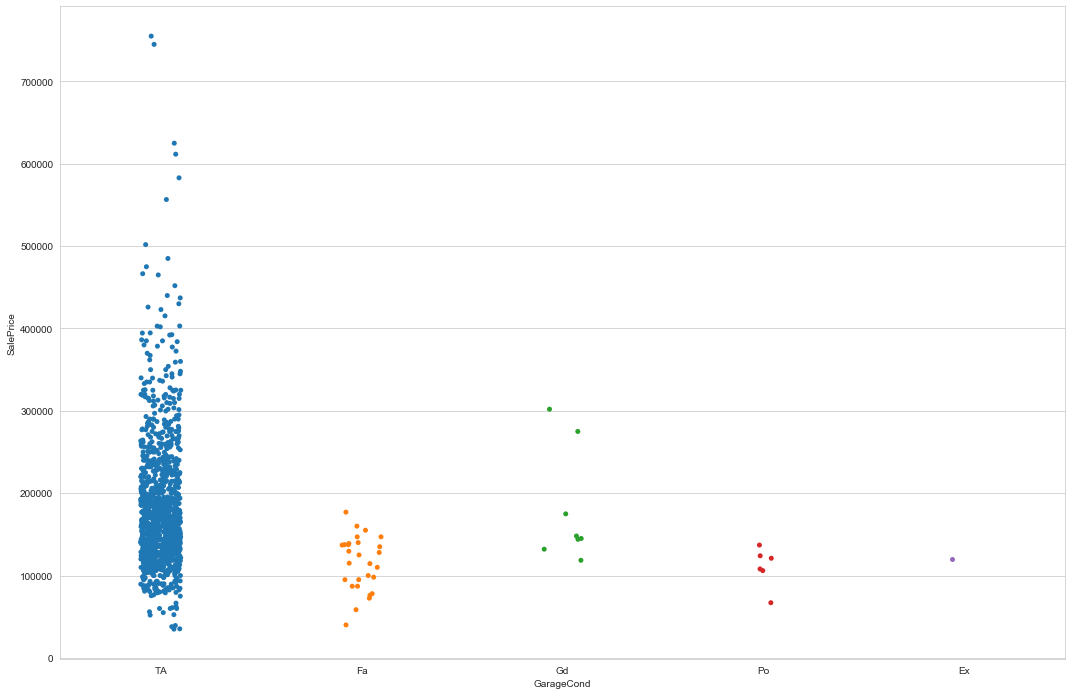

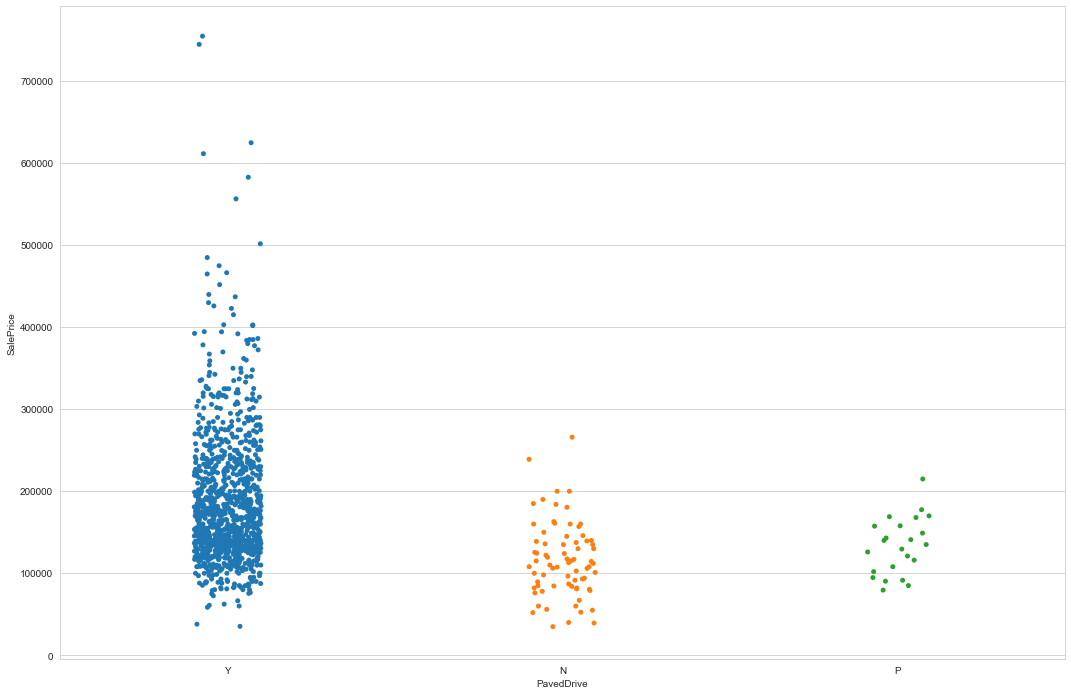

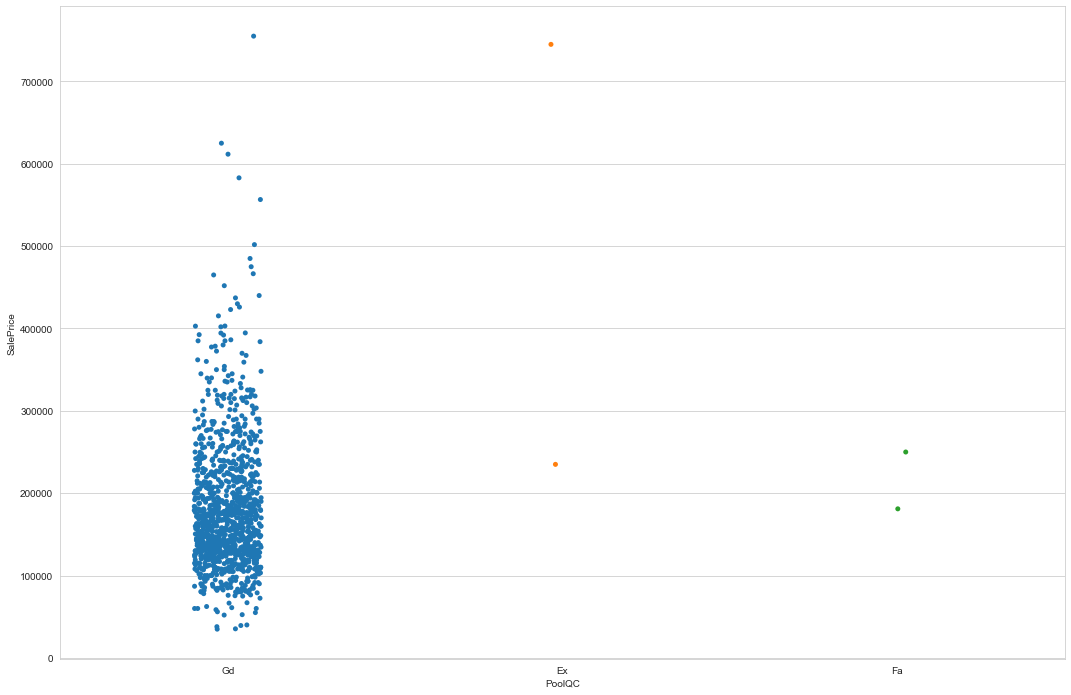

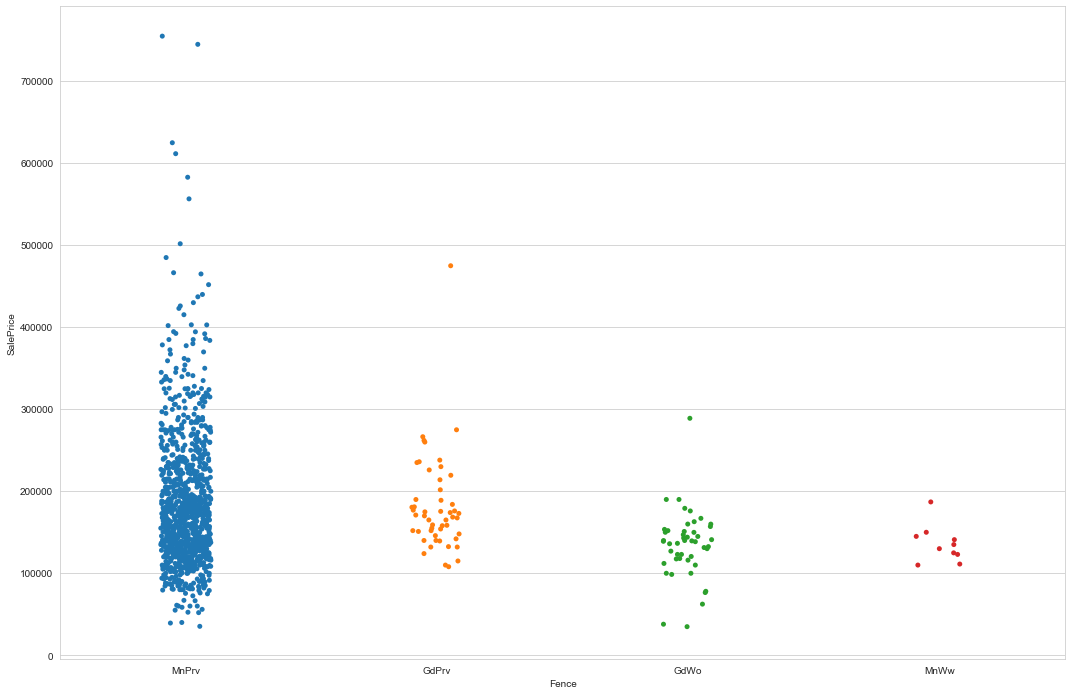

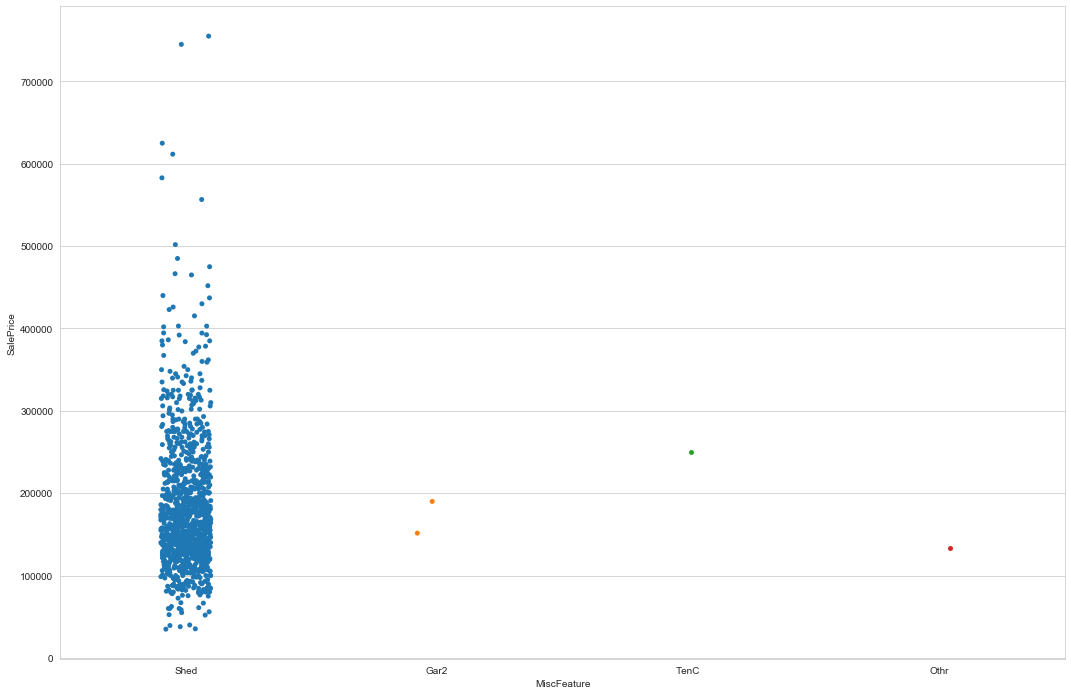

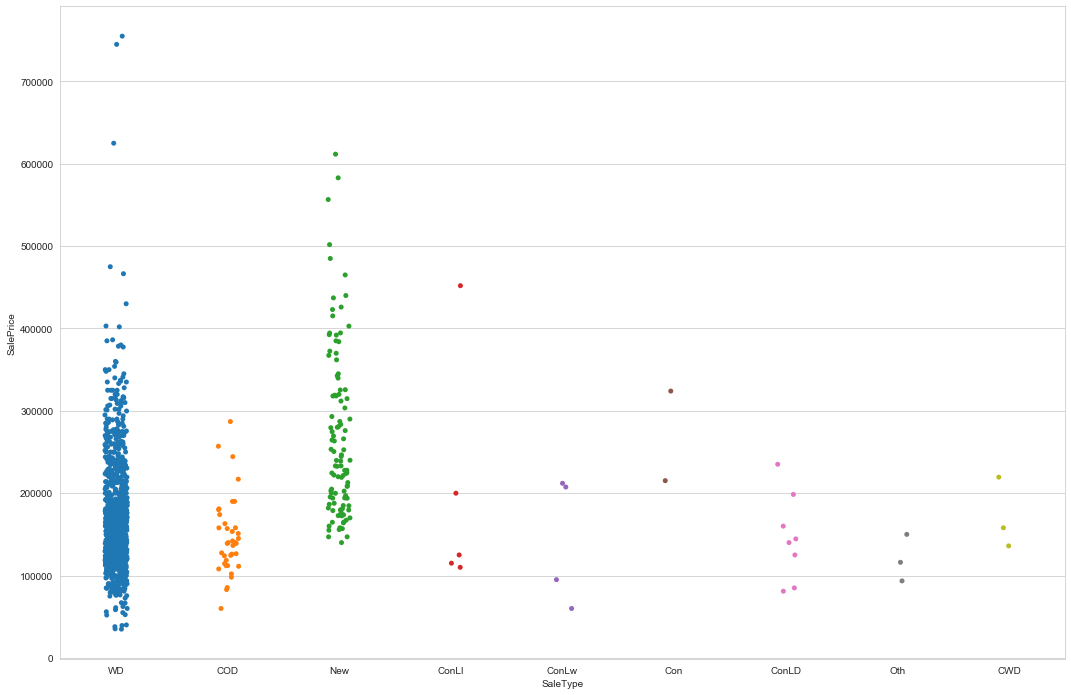

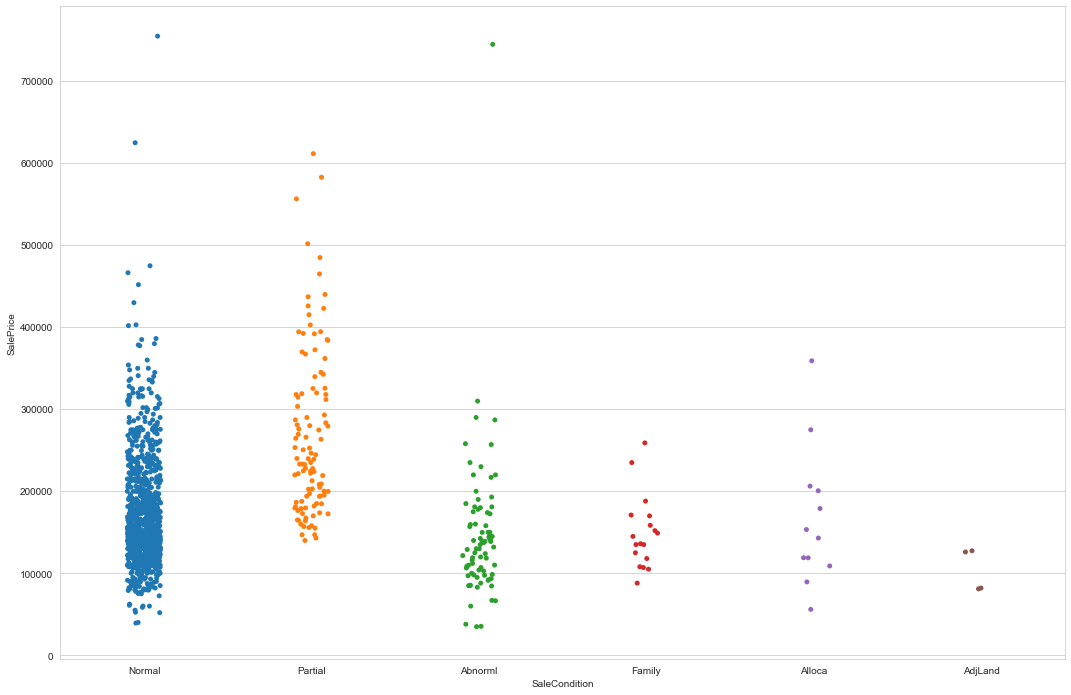

In [24]:
for i in df_str_types:
    plt.figure(figsize=(18,12))
    sns.set_style('whitegrid')
    sns.stripplot(x=i,y='SalePrice',data=df)
    plt.show()

In [25]:
df_int_types=[]
for i in df.columns:
    if df[i].dtypes == "int64" or "float64":
        df_int_types.append(i)

In [26]:
df_int_types

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

In [27]:
df_int_types=['Id',
 'MSSubClass']

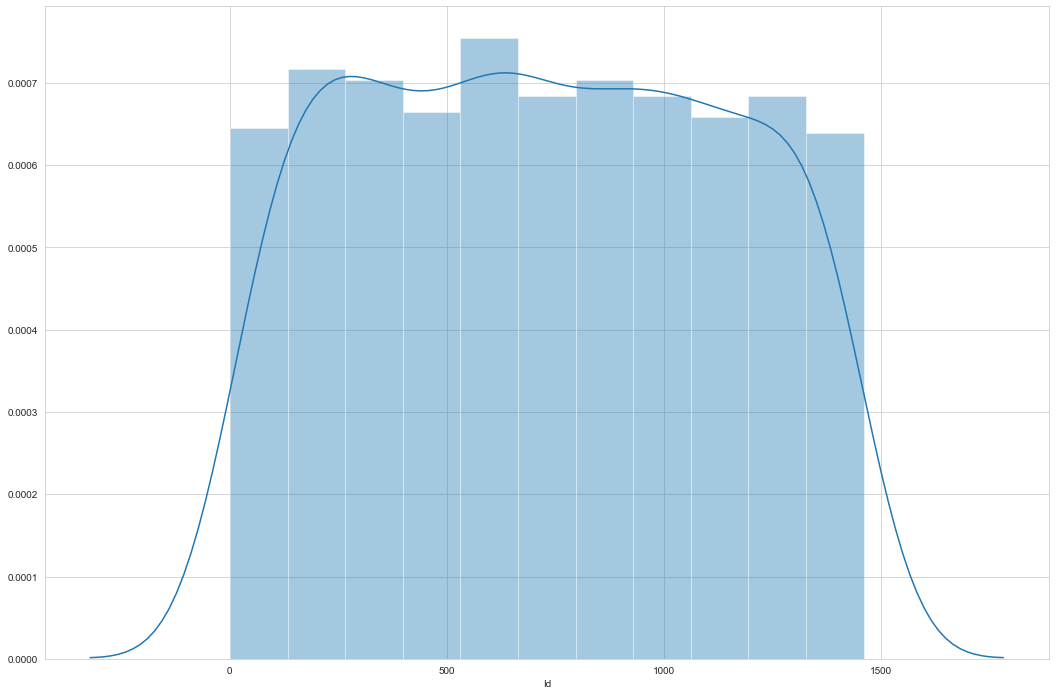

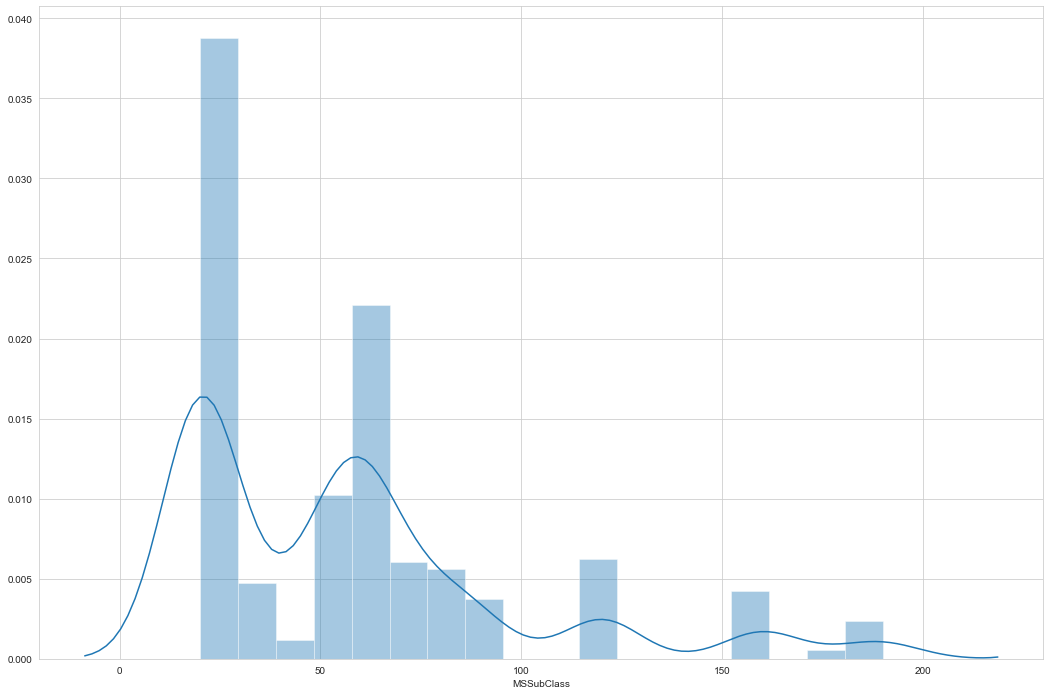

In [28]:
for i in df_int_types:
    plt.figure(figsize=(18,12))
    sns.set_style('whitegrid')
    sns.distplot(df[i])
    plt.show()

Observations :-
    
1. Majorly Id are in the range of 100-800.
2. Majorly type of dwelling are 20, 50 and 60.

# Label Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df_object_list:
    df[i]=LE.fit_transform(df[i])
    print(df[i].value_counts().sort_index())

0      9
1     52
2     16
3    928
4    163
Name: MSZoning, dtype: int64
0       4
1    1164
Name: Street, dtype: int64
0    1132
1      36
Name: Alley, dtype: int64
0    390
1     32
2      6
3    740
Name: LotShape, dtype: int64
0      50
1      42
2      30
3    1046
Name: LandContour, dtype: int64
0    1168
Name: Utilities, dtype: int64
0    222
1     69
2     33
3      2
4    842
Name: LotConfig, dtype: int64
0    1105
1      51
2      12
Name: LandSlope, dtype: int64
0      15
1       2
2      11
3      50
4      24
5     118
6      45
7      83
8      64
9      30
10      9
11     34
12    182
13      8
14     59
15     35
16     61
17     86
18     21
19     60
20     51
21     68
22     19
23     24
24      9
Name: Neighborhood, dtype: int64
0      38
1      67
2    1005
3       6
4      17
5       9
6      20
7       2
8       4
Name: Condition1, dtype: int64
0       2
1       6
2    1154
3       1
4       2
5       1
6       1
7       1
Name: Condition2, dtype: int64
0    9

# Dropping of Columns

In [30]:
# We will drop utilities column as it has only single type of value.
df.drop("Utilities", axis=1, inplace=True)

# Multivariate Analysis

In [31]:
dfcorr=df.corr()
dfcorr

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.004259  0.009307    -0.005969 -0.029212   
MSSubClass     0.004259    1.000000  0.007478    -0.336681 -0.124151   
MSZoning       0.009307    0.007478  1.000000    -0.069661 -0.023328   
LotFrontage   -0.005969   -0.336681 -0.069661     1.000000  0.299452   
LotArea       -0.029212   -0.124151 -0.023328     0.299452  1.000000   
Street         0.003613   -0.035981  0.140215    -0.035309 -0.263973   
Alley         -0.009049    0.216396 -0.371755    -0.187657 -0.093239   
LotShape       0.022978    0.104485  0.053655    -0.144523 -0.189201   
LandContour   -0.020245   -0.021387  0.001175    -0.073451 -0.159038   
LotConfig      0.053927    0.076880 -0.027246    -0.192468 -0.152063   
LandSlope      0.007152   -0.014930 -0.023952     0.046051  0.395410   
Neighborhood  -0.014989    0.013918 -0.251833     0.065824  0.010707   
Condition1     0.000425   -0.042474 -0.025651    -0.025581  0.029520   
Condition2     0.031623   -0.044319  0.031959     0.011761  0.040096   
BldgType       0.026302    0.731815 -0.024776    -0.403220 -0.215345   
HouseStyle     0.014518    0.381585 -0.110991     0.056321 -0.040637   
OverallQual   -0.036965    0.070462 -0.134037     0.229218  0.107188   
OverallCond    0.039761   -0.056978  0.189553    -0.047573  0.017513   
YearBuilt     -0.016942    0.023988 -0.299732     0.112655  0.005506   
YearRemodAdd  -0.018590    0.056618 -0.174586     0.088799  0.027228   
RoofStyle      0.037059   -0.100641  0.000913     0.146222  0.038615   
RoofMatl      -0.023900   -0.032214  0.009719     0.082566  0.194142   
Exterior1st   -0.045575   -0.090178 -0.012037     0.087727  0.048265   
Exterior2nd   -0.045721   -0.120022  0.005548     0.110762  0.027328   
MasVnrType     0.064161   -0.013252 -0.033521    -0.034388 -0.005204   
MasVnrArea    -0.060503    0.027813 -0.063862     0.188758  0.121086   
ExterQual     -0.006231   -0.024133  0.184815    -0.169835 -0.057865   
ExterCond      0.039946    0.004186 -0.099269     0.044582  0.011438   
Foundation    -0.006339    0.053951 -0.244844     0.090734 -0.021195   
BsmtQual       0.045212   -0.052242  0.123822    -0.176402 -0.075262   
BsmtCond       0.019818   -0.013220  0.002336     0.043165  0.010165   
BsmtExposure  -0.033328   -0.068192  0.037414    -0.123896 -0.136900   
BsmtFinType1   0.012860    0.017515  0.021518    -0.031507 -0.053584   
BsmtFinSF1     0.003868   -0.052236 -0.034161     0.228996  0.221851   
BsmtFinType2   0.037426    0.040573 -0.031322    -0.007509 -0.084713   
BsmtFinSF2     0.005269   -0.062403  0.027055     0.002159  0.056656   
BsmtUnfSF     -0.019494   -0.134170 -0.032638     0.113924  0.006600   
TotalBsmtSF   -0.013812   -0.214042 -0.058896     0.356107  0.259733   
Heating        0.041861    0.047734  0.051188    -0.026622 -0.020394   
HeatingQC      0.005955   -0.001994  0.119852    -0.078262 -0.003337   
CentralAir     0.003921   -0.113883 -0.015887     0.077404  0.051182   
Electrical     0.037801    0.045533 -0.079205     0.066868  0.050388   
1stFlrSF       0.009647   -0.227927 -0.033095     0.403436  0.312843   
2ndFlrSF      -0.029671    0.300366 -0.048968     0.089675  0.059803   
LowQualFinSF  -0.070180    0.053737  0.012098     0.007506 -0.001915   
GrLivArea     -0.024325    0.086448 -0.064125     0.374251  0.281360   
BsmtFullBath   0.023027    0.004556 -0.007287     0.094046  0.142387   
BsmtHalfBath  -0.043572    0.008207  0.006345     0.001389  0.059282   
FullBath      -0.015187    0.140807 -0.188837     0.171773  0.123197   
HalfBath      -0.028512    0.168423 -0.121209     0.047816  0.007271   
BedroomAbvGr   0.009376   -0.013283 -0.001906     0.237199  0.117351   
KitchenAbvGr   0.001216    0.283506  0.026744    -0.002729 -0.013075   
KitchenQual   -0.000240   -0.011378  0.111689    -0.174713 -0.064278   
TotRmsAbvGrd  -0.001613    0.051179 -0.031062     0.318771  0.184546   
Functional     0.019812    0.022913 -0.091684     0.039272 -0

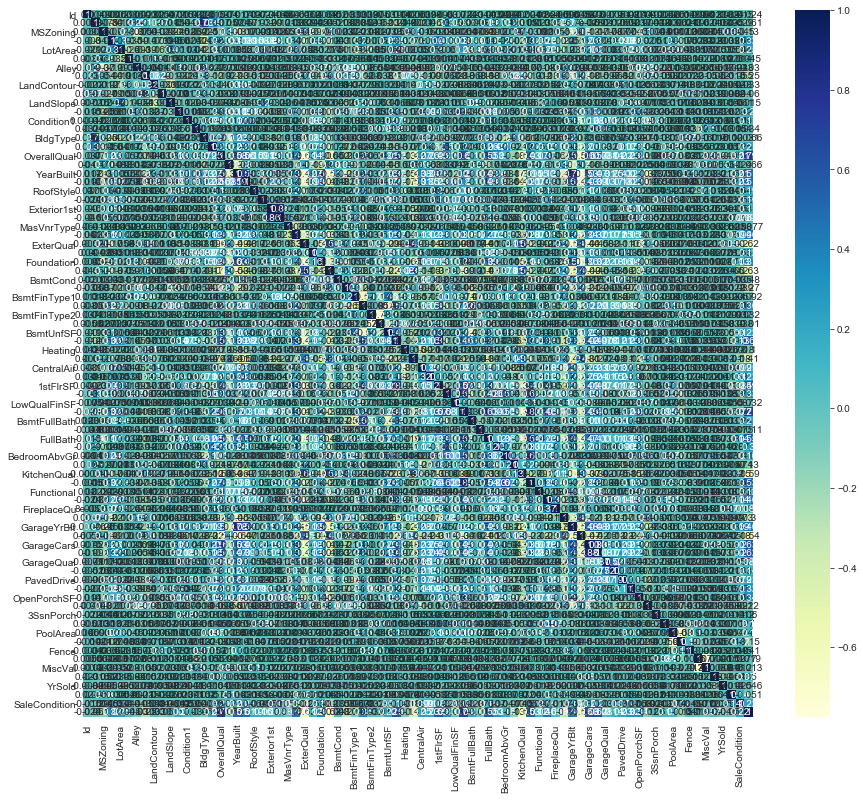

In [32]:
plt.figure(figsize=(15,13))
sns.heatmap(dfcorr,cmap='YlGnBu',annot=True)

In [33]:
dfcorr['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.458007
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
BedroomAbvGr     0.158281
GarageCond       0.135071
Functional       0.118673
ExterCond        0.115167
Exterior1st      0.108451
Condition1       0.105820
PoolArea    

In [34]:
dfcorr['OverallQual'].sort_values(ascending=True)

ExterQual       -0.630802
BsmtQual        -0.603212
KitchenQual     -0.558773
GarageFinish    -0.542390
HeatingQC       -0.426222
GarageType      -0.293190
BsmtExposure    -0.228048
LotShape        -0.189636
KitchenAbvGr    -0.178220
MSZoning        -0.134037
Heating         -0.127304
EnclosedPorch   -0.098374
LandSlope       -0.084261
OverallCond     -0.083167
PoolQC          -0.082520
SaleType        -0.049794
YrSold          -0.048759
BsmtFinSF2      -0.040893
LowQualFinSF    -0.039295
Id              -0.036965
LotConfig       -0.031717
BsmtHalfBath    -0.030702
MiscVal         -0.025786
MasVnrType      -0.011643
BsmtFinType1     0.008568
Fence            0.020901
MiscFeature      0.029438
Alley            0.036504
Condition2       0.045038
LandContour      0.045643
3SsnPorch        0.045919
BsmtCond         0.052189
Street           0.057140
ScreenPorch      0.059387
FireplaceQu      0.059519
BsmtFinType2     0.067952
MSSubClass       0.070462
PoolArea         0.072247
BldgType    

In [35]:
dfcorr['ExterQual'].sort_values(ascending=False)

ExterQual        1.000000
KitchenQual      0.635618
BsmtQual         0.591027
GarageFinish     0.454029
HeatingQC        0.432870
GarageType       0.232543
MSZoning         0.184815
BsmtExposure     0.180598
OverallCond      0.168404
LotShape         0.158076
EnclosedPorch    0.119846
KitchenAbvGr     0.106865
SaleType         0.084906
BsmtFinSF2       0.072374
FireplaceQu      0.053386
Heating          0.047474
BedroomAbvGr     0.045965
Street           0.044509
BsmtHalfBath     0.043978
LandSlope        0.035313
BsmtCond         0.026546
MiscVal          0.020771
PoolQC           0.015707
ScreenPorch     -0.006047
Id              -0.006231
LowQualFinSF    -0.009549
LandContour     -0.010117
YrSold          -0.011031
MiscFeature     -0.011611
LotConfig       -0.018388
MSSubClass      -0.024133
RoofMatl        -0.025944
MoSold          -0.028910
PoolArea        -0.036979
BsmtFinType1    -0.044835
Condition2      -0.047606
Functional      -0.048674
ExterCond       -0.050368
Alley       

In [36]:
dfcorr['SalePrice'].sort_values(ascending=True)

BsmtQual        -0.626850
ExterQual       -0.624820
KitchenQual     -0.592468
GarageFinish    -0.537121
HeatingQC       -0.406604
GarageType      -0.299470
BsmtExposure    -0.268559
LotShape        -0.248171
PoolQC          -0.152611
MSZoning        -0.133221
KitchenAbvGr    -0.132108
EnclosedPorch   -0.115004
Heating         -0.100021
BsmtFinType1    -0.092109
BldgType        -0.066028
OverallCond     -0.065642
MSSubClass      -0.060775
LotConfig       -0.060452
SaleType        -0.050851
YrSold          -0.045508
LowQualFinSF    -0.032381
Alley           -0.029798
Id              -0.023897
MiscVal         -0.013071
BsmtHalfBath    -0.011109
BsmtFinSF2      -0.010151
MasVnrType       0.007732
LandSlope        0.015485
MiscFeature      0.018725
BsmtFinType2     0.032285
LandContour      0.032836
Condition2       0.033956
Fence            0.040678
Street           0.044753
BsmtCond         0.048125
3SsnPorch        0.060119
MoSold           0.072764
GarageQual       0.080795
FireplaceQu 

Observations :-
    
1. SalePrice is highly positively correlated to OverallQual.
2. OverallQual is highly negatively correlated to ExterQual.
3. ExterQual is highly positively correlated to KitchenQual.
4. SalePrice is highly negatively correlated to BsmtQual.

# Plotting Outliers

Id                 AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
MSSubClass       AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
MSZoning         AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
LotFrontage      AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
LotArea          AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
Street           AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
Alley            AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
LotShape         AxesSubplot(0.817553,0.816017;0.0824468x0.0639...
LandContour        AxesSubplot(0.125,0.739237;0.0824468x0.0639831)
LotConfig        AxesSubplot(0.223936,0.739237;0.0824468x0.0639...
LandSlope        AxesSubplot(0.322872,0.739237;0.0824468x0.0639...
Neighborhood     AxesSubplot(0.421809,0.739237;0.0824468x0.0639...
Condition1       AxesSubplot(0.520745,0.739237;0.0824468x0.0639...
Condition2       AxesSubplot(0.619681,0.739237;0.0824468x0.0639...
BldgType         AxesSubplot(0.718617,0.739237;0.0824468x0.063

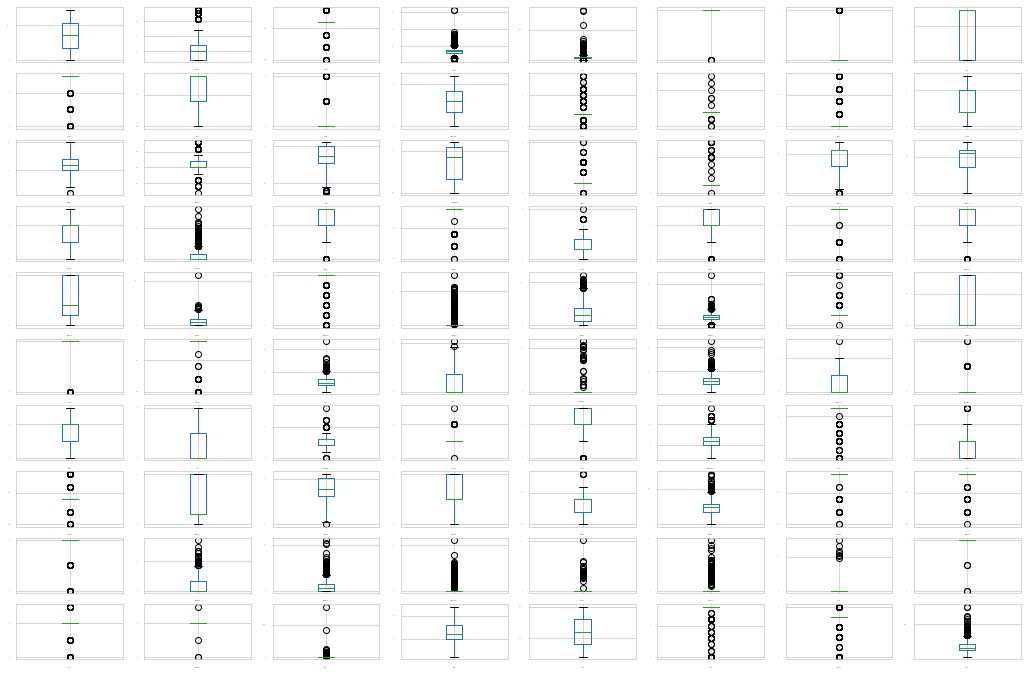

In [37]:
df.plot(kind='box',subplots=True,layout=(10,8),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. All the variables have outliers except Id, LotShape, LotConfig ,Neighborhood, HouseStyle , YearRemodAdd, Exterior2nd, MasVnrType, BsmtExposure, BsmtFinType1, MoSold, YrSold, GarageFinish, GarageType have outliers.

# Outliers Removal

In [38]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [39]:
z

array([[1.43548658, 1.50830058, 0.02164599, ..., 0.33003329, 0.20793187,
        0.67631017],
       [0.39632483, 0.87704243, 0.02164599, ..., 0.33003329, 0.20793187,
        1.09423443],
       [0.16554544, 0.07709478, 0.02164599, ..., 0.33003329, 0.20793187,
        1.11687211],
       ...,
       [1.26961389, 2.46243779, 0.02164599, ..., 0.33003329, 0.20793187,
        0.41705186],
       [1.66626597, 0.31562908, 4.76211672, ..., 0.33003329, 0.20793187,
        1.78922393],
       [0.25755011, 0.07709478, 0.02164599, ..., 0.33003329, 0.20793187,
        0.02179027]])

In [40]:
threshold=3
print(np.where(z>3))

(array([   1,    1,    1, ..., 1166, 1166, 1166], dtype=int64), array([10, 21, 35, ..., 40, 63, 64], dtype=int64))


In [41]:
df_new=df[(z<3).all(axis=1)]

In [42]:
df_new.shape

(468, 80)

In [43]:
df.shape

(1168, 80)

In [44]:
((1168-468)/1168)*100

59.93150684931506

In [45]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_new1=df[~((df<(Q1-1.5*IQR))|(df<(Q3+1.5*IQR))).any(axis=1)]

In [46]:
print("shape before and after")
print("shape before".ljust(20),":",df.shape)
print("shape after".ljust(20),":",df_new1.shape)

shape before and after
shape before         : (1168, 80)
shape after          : (0, 80)


In [47]:
print("Percentage Loss".ljust(20),":",(df.shape[0]-df_new1.shape[0])/df.shape[0])

Percentage Loss      : 1.0


In [48]:
df=df_new

In [49]:
df.shape

(468, 80)

# To check skewness

In [50]:
df.skew()

Id               -0.082818
MSSubClass        1.252514
MSZoning          2.303957
LotFrontage       0.056344
LotArea           0.236006
Street            0.000000
Alley             0.000000
LotShape         -0.388978
LandContour      -4.813865
LotConfig        -1.147953
LandSlope         0.000000
Neighborhood      0.185197
Condition1       -1.367386
Condition2        0.000000
BldgType          2.111627
HouseStyle        0.370095
OverallQual      -0.053929
OverallCond       1.133213
YearBuilt        -0.916962
YearRemodAdd     -0.846991
RoofStyle         1.656925
RoofMatl          0.000000
Exterior1st      -0.702820
Exterior2nd      -0.686013
MasVnrType        0.323116
MasVnrArea        1.532880
ExterQual        -0.144733
ExterCond        -3.130056
Foundation       -0.630389
BsmtQual         -1.289317
BsmtCond         -4.536127
BsmtExposure     -0.928034
BsmtFinType1      0.110098
BsmtFinSF1        0.408132
BsmtFinType2     -4.672676
BsmtFinSF2        5.250162
BsmtUnfSF         0.761111
T

In [51]:
df_rs=['MSSubClass','MSZoning','BldgType','OverallCond','RoofStyle','MasVnrArea','BsmtFinSF2','BsmtUnfSF','HeatingQC','2ndFlrSF',
      'LowQualFinSF','FireplaceQu','GarageType','WoodDeckSF','OpenPorchSF','EnclosedPorch','ScreenPorch','MiscVal','SaleCondition']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [52]:

df.skew()

Id               -0.082818
MSSubClass        0.703327
MSZoning          2.133062
LotFrontage       0.056344
LotArea           0.236006
Street            0.000000
Alley             0.000000
LotShape         -0.388978
LandContour      -4.813865
LotConfig        -1.147953
LandSlope         0.000000
Neighborhood      0.185197
Condition1       -1.367386
Condition2        0.000000
BldgType          2.049158
HouseStyle        0.370095
OverallQual      -0.053929
OverallCond       0.909275
YearBuilt        -0.916962
YearRemodAdd     -0.846991
RoofStyle         1.656925
RoofMatl          0.000000
Exterior1st      -0.702820
Exterior2nd      -0.686013
MasVnrType        0.323116
MasVnrArea        0.584436
ExterQual        -0.144733
ExterCond        -3.130056
Foundation       -0.630389
BsmtQual         -1.289317
BsmtCond         -4.536127
BsmtExposure     -0.928034
BsmtFinType1      0.110098
BsmtFinSF1        0.408132
BsmtFinType2     -4.672676
BsmtFinSF2        4.418272
BsmtUnfSF        -0.132957
T

In [53]:
df_rs=['MSSubClass','MSZoning','BldgType','OverallCond','RoofStyle','MasVnrArea','BsmtFinSF2','2ndFlrSF',
      'LowQualFinSF','FireplaceQu','GarageType','EnclosedPorch','ScreenPorch','MiscVal','SaleCondition']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [54]:
df.skew()

Id               -0.082818
MSSubClass        0.471010
MSZoning          2.019160
LotFrontage       0.056344
LotArea           0.236006
Street            0.000000
Alley             0.000000
LotShape         -0.388978
LandContour      -4.813865
LotConfig        -1.147953
LandSlope         0.000000
Neighborhood      0.185197
Condition1       -1.367386
Condition2        0.000000
BldgType          2.027980
HouseStyle        0.370095
OverallQual      -0.053929
OverallCond       0.774755
YearBuilt        -0.916962
YearRemodAdd     -0.846991
RoofStyle         1.656925
RoofMatl          0.000000
Exterior1st      -0.702820
Exterior2nd      -0.686013
MasVnrType        0.323116
MasVnrArea        0.214394
ExterQual        -0.144733
ExterCond        -3.130056
Foundation       -0.630389
BsmtQual         -1.289317
BsmtCond         -4.536127
BsmtExposure     -0.928034
BsmtFinType1      0.110098
BsmtFinSF1        0.408132
BsmtFinType2     -4.672676
BsmtFinSF2        4.114397
BsmtUnfSF        -0.132957
T

In [55]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [56]:
df_rs=['MSZoning','BldgType','OverallCond','RoofStyle','BsmtFinSF2',
      'LowQualFinSF','FireplaceQu','GarageType','EnclosedPorch','ScreenPorch','MiscVal','SaleCondition']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [57]:
df.skew()

Id               -0.082818
MSSubClass        0.471010
MSZoning          1.953426
LotFrontage       0.056344
LotArea           0.236006
Street            0.000000
Alley             0.000000
LotShape         -0.388978
LandContour      -4.813865
LotConfig        -1.147953
LandSlope         0.000000
Neighborhood      0.185197
Condition1       -1.367386
Condition2        0.000000
BldgType          2.021786
HouseStyle        0.370095
OverallQual      -0.053929
OverallCond       0.700179
YearBuilt        -0.916962
YearRemodAdd     -0.846991
RoofStyle         1.656925
RoofMatl          0.000000
Exterior1st      -0.702820
Exterior2nd      -0.686013
MasVnrType        0.323116
MasVnrArea        0.214394
ExterQual        -0.144733
ExterCond        -3.130056
Foundation       -0.630389
BsmtQual         -1.289317
BsmtCond         -4.536127
BsmtExposure     -0.928034
BsmtFinType1      0.110098
BsmtFinSF1        0.408132
BsmtFinType2     -4.672676
BsmtFinSF2        4.020580
BsmtUnfSF        -0.132957
T

In [58]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [59]:
df_rs=['MSZoning','BldgType','OverallCond','RoofStyle','BsmtFinSF2',
      'LowQualFinSF','FireplaceQu','GarageType','EnclosedPorch','ScreenPorch','MiscVal','SaleCondition']
for val in df_rs:
    if df.skew().loc[val]>0.55:
        df[val]=np.sqrt(df[val])

In [60]:
df.skew()

Id               -0.082818
MSSubClass        0.471010
MSZoning          1.918124
LotFrontage       0.056344
LotArea           0.236006
Street            0.000000
Alley             0.000000
LotShape         -0.388978
LandContour      -4.813865
LotConfig        -1.147953
LandSlope         0.000000
Neighborhood      0.185197
Condition1       -1.367386
Condition2        0.000000
BldgType          2.020109
HouseStyle        0.370095
OverallQual      -0.053929
OverallCond       0.660818
YearBuilt        -0.916962
YearRemodAdd     -0.846991
RoofStyle         1.656925
RoofMatl          0.000000
Exterior1st      -0.702820
Exterior2nd      -0.686013
MasVnrType        0.323116
MasVnrArea        0.214394
ExterQual        -0.144733
ExterCond        -3.130056
Foundation       -0.630389
BsmtQual         -1.289317
BsmtCond         -4.536127
BsmtExposure     -0.928034
BsmtFinType1      0.110098
BsmtFinSF1        0.408132
BsmtFinType2     -4.672676
BsmtFinSF2        3.994193
BsmtUnfSF        -0.132957
T

In [61]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [62]:
df_ls=['LandContour','LotConfig','Condition1','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterCond','Foundation',
     'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','SaleType','Fence','PavedDrive','GarageYrBlt','FireplaceQu','Functional',
       'KitchenQual','Electrical']
for val in df_ls:
    if df.skew().loc[val]<-0.55:
        df[val]=np.cbrt(df[val])

In [63]:
df.skew()

Id               -0.082818
MSSubClass        0.471010
MSZoning          1.918124
LotFrontage       0.056344
LotArea           0.236006
Street            0.000000
Alley             0.000000
LotShape         -0.388978
LandContour      -4.854122
LotConfig        -1.474827
LandSlope         0.000000
Neighborhood      0.185197
Condition1       -6.559804
Condition2        0.000000
BldgType          2.020109
HouseStyle        0.370095
OverallQual      -0.053929
OverallCond       0.660818
YearBuilt        -0.932316
YearRemodAdd     -0.852390
RoofStyle         1.656925
RoofMatl          0.000000
Exterior1st      -2.832731
Exterior2nd      -2.481421
MasVnrType        0.323116
MasVnrArea        0.214394
ExterQual        -0.144733
ExterCond        -3.130056
Foundation       -3.258708
BsmtQual         -2.943844
BsmtCond         -4.536127
BsmtExposure     -1.217716
BsmtFinType1      0.110098
BsmtFinSF1        0.408132
BsmtFinType2     -4.906220
BsmtFinSF2        3.994193
BsmtUnfSF        -0.132957
T

In [64]:
df_ls=['LandContour','LotConfig','Condition1','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterCond','Foundation',
     'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','SaleType','Fence','PavedDrive','GarageYrBlt','FireplaceQu','Functional',
       'KitchenQual','Electrical']
for val in df_ls:
    if df.skew().loc[val]<-0.55:
        df[val]=np.cbrt(df[val])

In [65]:
df_ls=['LandContour','LotConfig','Condition1','YearBuilt','YearRemodAdd','Exterior1st','Exterior2nd','ExterCond','Foundation',
     'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','SaleType','Fence','PavedDrive','GarageYrBlt','FireplaceQu','Functional',
       'KitchenQual','Electrical']
for val in df_ls:
    if df.skew().loc[val]<-0.55:
        df[val]=np.cbrt(df[val])

In [66]:
df.skew()

Id               -0.082818
MSSubClass        0.471010
MSZoning          1.918124
LotFrontage       0.056344
LotArea           0.236006
Street            0.000000
Alley             0.000000
LotShape         -0.388978
LandContour      -4.871382
LotConfig        -1.652960
LandSlope         0.000000
Neighborhood      0.185197
Condition1       -7.994079
Condition2        0.000000
BldgType          2.020109
HouseStyle        0.370095
OverallQual      -0.053929
OverallCond       0.660818
YearBuilt        -0.939206
YearRemodAdd     -0.854796
RoofStyle         1.656925
RoofMatl          0.000000
Exterior1st     -10.371567
Exterior2nd     -10.292133
MasVnrType        0.323116
MasVnrArea        0.214394
ExterQual        -0.144733
ExterCond        -3.130056
Foundation       -5.713346
BsmtQual         -3.298705
BsmtCond         -4.536127
BsmtExposure     -1.323753
BsmtFinType1      0.110098
BsmtFinSF1        0.408132
BsmtFinType2     -5.046084
BsmtFinSF2        3.994193
BsmtUnfSF        -0.132957
T

In [67]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

# Dropping of Columns

In [68]:
# We will remove PavedDrive , LowQualFinSF, Electrical, Exterior2nd and Exterior1st columns because their skewness is very high.

In [69]:
df.drop(['PavedDrive','LowQualFinSF', 'Electrical', 'Exterior2nd', 'Exterior1st'], axis=1,inplace=True)

In [70]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea'

In [71]:
x=df[['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']]

y=df['SalePrice']

In [72]:
x.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0    127    3.309751  1.071075     70.98847     4928       1      0         0   
2    793    2.783158  1.071075     92.00000     9920       1      0         0   
5   1197    2.783158  1.071075     58.00000    14054       1      0         0   
6    561    2.114743  1.071075     70.98847    11341       1      0         0   
11   833    2.783158  1.071075     44.00000     9548       1      0         0   

    LandContour  LotConfig  ...  ScreenPorch  PoolArea  PoolQC     Fence  \
0      1.041528   1.052685  ...     0.000000         0       2  1.026004   
2      1.041528   1.000000  ...     0.000000         0       2  1.026004   
5      1.041528   1.052685  ...     0.000000         0       2  1.026004   
6      1.041528   1.052685  ...     1.329253         0       2  1.026004   
11     1.041528   1.000000  ...     0.000000         0       2  1.026004   

    MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0             2      0.0       2    2007  1.080060       1.090508  
2             2      0.0       6    2007  1.080060       1.090508  
5             2      0.0      11    2006  1.068613       1.105823  
6             2      0.0       5    2010  1.080060       1.090508  
11            2      0.0       1    2010  1.080060       1.090508  

[5 rows x 74 columns]

# Scaling of Data

In [73]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(x)

In [74]:
x

array([[-1.47845427,  1.55446225, -0.29950928, ..., -0.63708401,
         0.33015019, -0.25883548],
       [ 0.09879842,  0.42917684, -0.29950928, ..., -0.63708401,
         0.33015019, -0.25883548],
       [ 1.05557032,  0.42917684, -0.29950928, ..., -1.37145671,
        -1.9585694 ,  2.55052859],
       ...,
       [-1.09479821, -0.99917008, -0.29950928, ...,  1.5660341 ,
         0.33015019, -0.25883548],
       [-1.31504521,  2.08186996, -0.29950928, ...,  0.83166139,
         0.33015019, -0.25883548],
       [-0.3180131 ,  0.42917684, -0.29950928, ..., -1.37145671,
         0.33015019, -0.25883548]])

In [75]:
x=pd.DataFrame(x)

In [76]:
x

0         1         2         3         4    5    6         7   \
0   -1.478454  1.554462 -0.299509  0.042301 -1.269309  0.0  0.0 -1.227147   
1    0.098798  0.429177 -0.299509  1.164508  0.210048  0.0  0.0 -1.227147   
2    1.055570  0.429177 -0.299509 -0.651401  1.435140  0.0  0.0 -1.227147   
3   -0.450635 -0.999170 -0.299509  0.042301  0.631155  0.0  0.0 -1.227147   
4    0.193528  0.429177 -0.299509 -1.399129  0.099807  0.0  0.0 -1.227147   
..        ...       ...       ...       ...       ...  ...  ...       ...   
463 -0.185391 -0.999170 -0.299509  0.042301  0.604187  0.0  0.0 -1.227147   
464  1.301868  0.429177 -0.299509  0.042301  0.459571  0.0  0.0 -1.227147   
465 -1.094798 -0.999170 -0.299509  0.042301  0.180117  0.0  0.0 -1.227147   
466 -1.315045  2.081870 -0.299509 -2.467310 -2.054033  0.0  0.0  0.831293   
467 -0.318013  0.429177 -0.299509  0.042301 -0.400128  0.0  0.0 -1.227147   

           8         9   ...        64   65   66        67   68        69  \
0    0.201316  0.483212  ... -0.227314  0.0  0.0  0.180438  0.0 -0.155081   
1    0.201316  0.352845  ... -0.227314  0.0  0.0  0.180438  0.0 -0.155081   
2    0.201316  0.483212  ... -0.227314  0.0  0.0  0.180438  0.0 -0.155081   
3    0.201316  0.483212  ...  4.294240  0.0  0.0  0.180438  0.0 -0.155081   
4    0.201316  0.352845  ... -0.227314  0.0  0.0  0.180438  0.0 -0.155081   
..        ...       ...  ...       ...  ...  ...       ...  ...       ...   
463  0.201316  0.483212  ... -0.227314  0.0  0.0  0.180438  0.0 -0.155081   
464  0.201316  0.352845  ... -0.227314  0.0  0.0  0.180438  0.0 -0.155081   
465  0.201316  0.483212  ... -0.227314  0.0  0.0  0.180438  0.0 -0.155081   
466  0.201316  0.417192  ... -0.227314  0.0  0.0  0.180438  0.0 -0.155081   
467  0.201316  0.483212  ... -0.227314  0.0  0.0  0.180438  0.0 -0.155081   

           70        71        72        73  
0   -1.628707 -0.637084  0.330150 -0.258835  
1   -0.101182 -0.637084  0.330150 -0.258835  
2    1.808224 -1.371457 -1.958569  2.550529  
3   -0.483063  1.566034  0.330150 -0.258835  
4   -2.010588  1.566034  0.330150 -0.258835  
..        ...       ...       ...       ...  
463 -0.101182 -1.371457  0.330150 -0.258835  
464 -0.483063  0.831661  0.330150 -0.258835  
465 -1.628707  1.566034  0.330150 -0.258835  
466  0.280699  0.831661  0.330150 -0.258835  
467 -0.101182 -1.371457  0.330150 -0.258835  

[468 rows x 74 columns]

In [77]:
x.columns=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

In [78]:
x.head()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0 -1.478454    1.554462 -0.299509     0.042301 -1.269309     0.0    0.0   
1  0.098798    0.429177 -0.299509     1.164508  0.210048     0.0    0.0   
2  1.055570    0.429177 -0.299509    -0.651401  1.435140     0.0    0.0   
3 -0.450635   -0.999170 -0.299509     0.042301  0.631155     0.0    0.0   
4  0.193528    0.429177 -0.299509    -1.399129  0.099807     0.0    0.0   

   LotShape  LandContour  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0 -1.227147     0.201316   0.483212  ...    -0.227314       0.0     0.0   
1 -1.227147     0.201316   0.352845  ...    -0.227314       0.0     0.0   
2 -1.227147     0.201316   0.483212  ...    -0.227314       0.0     0.0   
3 -1.227147     0.201316   0.483212  ...     4.294240       0.0     0.0   
4 -1.227147     0.201316   0.352845  ...    -0.227314       0.0     0.0   

      Fence  MiscFeature   MiscVal    MoSold    YrSold  SaleType  \
0  0.180438          0.0 -0.155081 -1.628707 -0.637084  0.330150   
1  0.180438          0.0 -0.155081 -0.101182 -0.637084  0.330150   
2  0.180438          0.0 -0.155081  1.808224 -1.371457 -1.958569   
3  0.180438          0.0 -0.155081 -0.483063  1.566034  0.330150   
4  0.180438          0.0 -0.155081 -2.010588  1.566034  0.330150   

   SaleCondition  
0      -0.258835  
1      -0.258835  
2       2.550529  
3      -0.258835  
4      -0.258835  

[5 rows x 74 columns]

# Train Test Split

In [79]:
from sklearn.model_selection import train_test_split
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    r2score=r2_score(y_test,pred)
    print(r2_score(y_test,pred))
    print('error:')
    print('Mean absolute error:',mean_absolute_error(y_test,pred))
    print('Mean squared error:',mean_squared_error(y_test,pred))
    print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))
    if r2score>maxAccu:
        maxAccu=r2score
        maxRS=i
        
print("Best accuracy is",maxAccu,"on Random_state",maxRS)

0.8605344919972682
error:
Mean absolute error: 14638.547217587384
Mean squared error: 571946983.7210726
Root Mean squared error: 23915.413099527937
0.8414343477323887
error:
Mean absolute error: 16988.639411079588
Mean squared error: 541535916.1703359
Root Mean squared error: 23270.924265493537
0.8407413453001752
error:
Mean absolute error: 17499.54784920548
Mean squared error: 762706654.7655412
Root Mean squared error: 27617.144218139954
0.8986325702803114
error:
Mean absolute error: 14090.743699588997
Mean squared error: 336490582.3400812
Root Mean squared error: 18343.67962923691
0.8784858057751115
error:
Mean absolute error: 16091.798048923412
Mean squared error: 437728375.45371515
Root Mean squared error: 20921.959168627473
0.9036586255181066
error:
Mean absolute error: 13381.709042212817
Mean squared error: 320564123.2683984
Root Mean squared error: 17904.304601642543
0.8747573954583896
error:
Mean absolute error: 14955.407401817187
Mean squared error: 390157635.4702891
Root Mean

# Algorithms

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=58)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9359912426997713
error:
Mean absolute error: 12093.277385942212
Mean squared error: 240487311.76589918
Root Mean squared error: 15507.653328788956


In [81]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
r2score=r2_score(y_test,preddtr)
print(r2_score(y_test,preddtr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,preddtr))
print('Mean squared error:',mean_squared_error(y_test,preddtr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,preddtr)))

0.7176175579715455
error:
Mean absolute error: 22694.14563106796
Mean squared error: 1060939115.7961165
Root Mean squared error: 32572.060355404545


In [82]:
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
predknn=knn.predict(x_test)
r2score=r2_score(y_test,predknn)
print(r2_score(y_test,predknn))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predknn))
print('Mean squared error:',mean_squared_error(y_test,predknn))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predknn)))

0.835364035460705
error:
Mean absolute error: 18948.09708737864
Mean squared error: 618553807.3537865
Root Mean squared error: 24870.74199443568


In [83]:
svm=SVR()
svm.fit(x_train,y_train)
predsvr=svm.predict(x_test)
r2score=r2_score(y_test,predsvr)
print(r2_score(y_test,predsvr))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predsvr))
print('Mean squared error:',mean_squared_error(y_test,predsvr))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predsvr)))

-0.032173679283992396
error:
Mean absolute error: 48457.55695189979
Mean squared error: 3877979887.0683227
Root Mean squared error: 62273.428419096395


In [84]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2score=r2_score(y_test,predrf)
print(r2_score(y_test,predrf))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
mean_squared_error_rf=mean_squared_error(y_test,predrf)
print('Mean squared error:',mean_squared_error_rf)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

0.9077891853706255
error:
Mean absolute error: 13870.764660194172
Mean squared error: 346445265.6368426
Root Mean squared error: 18613.040204030145


Linear Regression is the best algorithm.

# Cross Validation Score

In [85]:
from sklearn.model_selection import cross_val_score
lmscores=cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.89157056 0.90950213 0.84003116 0.93489632 0.84690141]
0.8845803160883987 0.036348282629104084


In [86]:
list1=[0.9359912426997713]
list2=[0.8845803160883987]
difference=[]
zip_object = zip(list1, list2)
for list1_i, list2_i in zip_object:
    difference.append(list1_i-list2_i)


print(difference)

[0.05141092661137259]


As the difference between accuracy scores and cross validation scores of Linear Regression is 0.05%. So, It is verified that
Linear Regression is the best algorithm for this model with accuracy of 93.543%.

# Hyper Parameter Tuning

In [87]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [88]:
ls=Lasso()
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred=ls.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
mean_squared_error_ls=mean_squared_error(y_test,pred)
print('Mean squared error:',mean_squared_error_ls)
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9349551236380786
error:
Mean absolute error: 12141.860228340449
Mean squared error: 244380114.84981343
Mean squared error: 244380114.84981343
Root Mean squared error: 15632.661796693916


In [89]:
rd=Ridge()
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
predrd=rd.predict(x_test)
r2score=r2_score(y_test,predrd)
print(r2_score(y_test,predrd))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predrd))
mean_squared_error_rd=mean_squared_error(y_test,predrd)
print('Mean squared error:',mean_squared_error_rd)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predrd)))

0.9346575332483626
error:
Mean absolute error: 12064.783335923941
Mean squared error: 245498191.7481746
Root Mean squared error: 15668.381912251649


In [90]:
el=ElasticNet()
el.fit(x_train,y_train)
el.score(x_train,y_train)
predel=el.predict(x_test)
r2score=r2_score(y_test,predel)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,predel))
mean_squared_error_el=mean_squared_error(y_test,predel)
print('Mean squared error:',mean_squared_error_el)
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,predel)))

0.9349551236380786
error:
Mean absolute error: 13530.272645367431
Mean squared error: 331446630.25745445
Root Mean squared error: 18205.675770414415


Lasso Regression is giving the best accuracy. This has increased the accuracy scores from 93.543% to 93.544%.

# Cleaning of Test Dataset

In [91]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [92]:
df_1=pd.read_csv('housingtest.csv')
df_1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [93]:
df_1.shape

(292, 80)

In [94]:
df_1.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [95]:
df_1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [96]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# Summary Statistics

In [97]:
df_1.describe()

Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count   292.000000  292.000000   247.000000     292.000000   292.000000   
mean    755.955479   57.414384    66.425101   10645.143836     6.078767   
std     442.565228   43.780649    21.726343   13330.669795     1.356147   
min       6.000000   20.000000    21.000000    1526.000000     3.000000   
25%     377.750000   20.000000    53.500000    7200.000000     5.000000   
50%     778.000000   50.000000    65.000000    9200.000000     6.000000   
75%    1152.250000   70.000000    79.000000   11658.750000     7.000000   
max    1456.000000  190.000000   150.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count   292.000000   292.000000    292.000000   291.000000   292.000000  ...   
mean      5.493151  1972.616438   1985.294521   109.171821   439.294521  ...   
std       1.063267    30.447016     20.105792   175.030021   429.559675  ...   
min       3.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1968.000000     0.000000     0.000000  ...   
50%       5.000000  1976.000000   1994.000000     0.000000   369.500000  ...   
75%       6.000000  2001.000000   2003.250000   180.000000   700.500000  ...   
max       9.000000  2009.000000   2010.000000  1031.000000  1767.000000  ...   

       WoodDeckSF  OpenPorchSF  EnclosedPorch   3SsnPorch  ScreenPorch  \
count  292.000000   292.000000     292.000000  292.000000   292.000000   
mean    86.397260    47.061644      17.708904    2.489726    15.099315   
std    121.898836    65.865449      51.892906   30.247488    58.483473   
min      0.000000     0.000000       0.000000    0.000000     0.000000   
25%      0.000000     0.000000       0.000000    0.000000     0.000000   
50%      0.000000    28.500000       0.000000    0.000000     0.000000   
75%    149.250000    66.000000       0.000000    0.000000     0.000000   
max    728.000000   418.000000     330.000000  407.000000   396.000000   

       PoolArea  PoolQC      MiscVal      MoSold       YrSold  
count     292.0     0.0   292.000000  292.000000   292.000000  
mean        0.0     NaN    28.184932    6.232877  2007.859589  
std         0.0     NaN   224.036218    2.774556     1.322867  
min         0.0     NaN     0.000000    1.000000  2006.000000  
25%         0.0     NaN     0.000000    4.000000  2007.000000  
50%         0.0     NaN     0.000000    6.000000  2008.000000  
75%         0.0     NaN     0.000000    8.000000  2009.000000  
max         0.0     NaN  3500.000000   12.000000  2010.000000  

[8 rows x 38 columns]

Observations :-

1. Mean is more than median for SalePrice, MoSold, MiscVal, PoolArea, ScreenPorch, 3SsnPorch, EnclosedPorch, OpenPorchSF,
WoodDeckSF, BsmtFinSF1, MasVnrArea, YearRemodAdd, OverallCond, OverallQual, LotArea, LotFrontage, MSSubClass and Id Column.
2. There is large difference between 75% and maximum for Price column.

To check missing values

In [98]:
pd.set_option('display.max_rows',100)
df_1.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

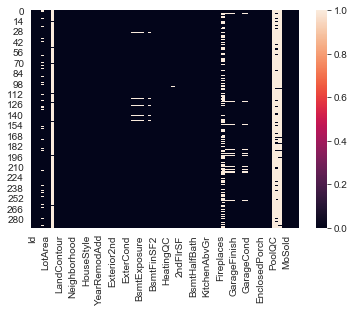

In [99]:
sns.heatmap(df_1.isnull())

Observations :-
    
1. LotFrontage, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence and MiscFeature have null values.

In [100]:
df_1.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [101]:
df_1_object_list=[]
for i in df_1.columns:
    if df_1[i].dtypes == "object":
        df_1_object_list.append(i)

In [102]:
for i in df_1_object_list:
    df_1[i]=df_1[i].fillna(df_1[i].mode()[0])

In [103]:
df_1_int_types=[]
for i in df_1.columns:
    if df_1[i].dtypes == "int64":
        df_1_int_types.append(i)

In [104]:
for i in df_1_int_types:
    df_1[i]=df_1[i].fillna(df_1[i].mean())

In [105]:
df_1_float_types=[]
for i in df_1.columns:
    if df_1[i].dtypes == "float64":
        df_1_float_types.append(i)

In [106]:
df_1_float_types

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [107]:
for i in df_1_float_types:
    df_1[i]=df_1[i].fillna(df_1[i].mean())

In [108]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

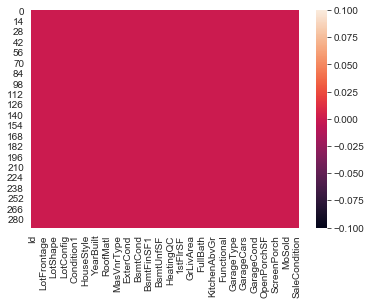

In [109]:
sns.heatmap(df_1.isnull())

In [110]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
for i in df_1_object_list:
    df_1[i]=LE.fit_transform(df_1[i])
    print(df_1[i].value_counts().sort_index())

0      1
1     13
2    223
3     55
Name: MSZoning, dtype: int64
0      2
1    290
Name: Street, dtype: int64
0     94
1      9
2      4
3    185
Name: LotShape, dtype: int64
0     13
1      8
2      6
3    265
Name: LandContour, dtype: int64
0    291
1      1
Name: Utilities, dtype: int64
0     41
1     25
2     14
3      2
4    210
Name: LotConfig, dtype: int64
0    277
1     14
2      1
Name: LandSlope, dtype: int64
0      2
1      5
2      8
3      4
4     32
5      6
6     17
7     15
8      7
9      8
10    15
11    43
12     1
13    14
14     6
15    16
16    27
17     4
18    14
19     8
20    18
21     6
22    14
23     2
Name: Neighborhood, dtype: int64
0     10
1     14
2    255
3      2
4      2
5      2
6      6
7      1
Name: Condition1, dtype: int64
0    291
1      1
Name: Condition2, dtype: int64
0    239
1      4
2     11
3     14
4     24
Name: BldgType, dtype: int64
0     33
1      2
2    148
3      1
4      1
5     84
6      5
7     18
Name: HouseStyle, dtype: int64

In [111]:
df_1["Utilities"].value_counts()

0    291
1      1
Name: Utilities, dtype: int64

# Plotting Outliers

In [112]:
df_1.shape

(292, 76)

Id                   AxesSubplot(0.125,0.86337;0.352273x0.01663)
MSSubClass        AxesSubplot(0.547727,0.86337;0.352273x0.01663)
MSZoning            AxesSubplot(0.125,0.843414;0.352273x0.01663)
LotFrontage      AxesSubplot(0.547727,0.843414;0.352273x0.01663)
LotArea             AxesSubplot(0.125,0.823458;0.352273x0.01663)
Street           AxesSubplot(0.547727,0.823458;0.352273x0.01663)
LotShape            AxesSubplot(0.125,0.803502;0.352273x0.01663)
LandContour      AxesSubplot(0.547727,0.803502;0.352273x0.01663)
Utilities           AxesSubplot(0.125,0.783546;0.352273x0.01663)
LotConfig        AxesSubplot(0.547727,0.783546;0.352273x0.01663)
LandSlope            AxesSubplot(0.125,0.76359;0.352273x0.01663)
Neighborhood      AxesSubplot(0.547727,0.76359;0.352273x0.01663)
Condition1          AxesSubplot(0.125,0.743634;0.352273x0.01663)
Condition2       AxesSubplot(0.547727,0.743634;0.352273x0.01663)
BldgType            AxesSubplot(0.125,0.723678;0.352273x0.01663)
HouseStyle       AxesSubp

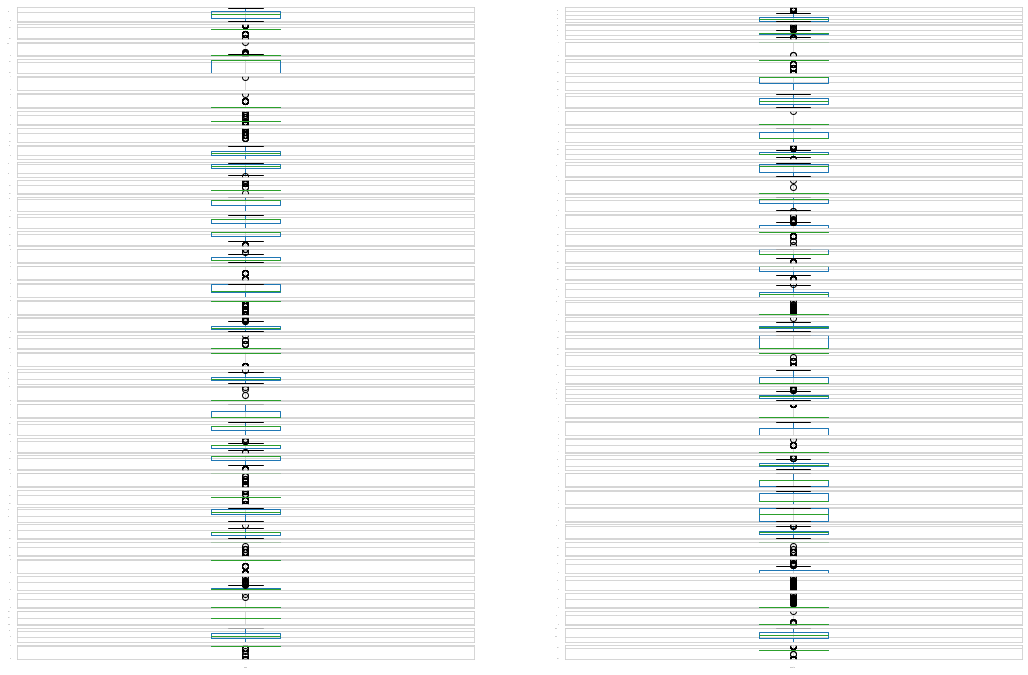

In [113]:
df_1.plot(kind='box',subplots=True,layout=(38,2),sharex=False,fontsize=1,figsize=(18,12))

Observations :-
    
1. All the variables have outliers except Id, LotShape, LotConfig ,Neighborhood, HouseStyle , YearRemodAdd, 

In [114]:
from scipy.stats import zscore
z=np.abs(zscore(df_1))

In [115]:

z

array([[0.94827766, 0.85605433, 0.28700579, ..., 0.65090813, 0.23029007,
        0.14865423],
       [0.59312021, 1.43198105, 0.28700579, ..., 0.86355541, 6.49418003,
        3.32390858],
       [0.39167468, 0.85605433, 0.28700579, ..., 0.86355541, 0.23029007,
        0.14865423],
       ...,
       [1.67257621, 0.85605433, 0.28700579, ..., 1.62078718, 0.23029007,
        0.14865423],
       [0.52727912, 0.16964372, 1.80813647, ..., 1.4081399 , 0.23029007,
        0.14865423],
       [1.41021953, 2.3471952 , 1.80813647, ..., 1.4081399 , 0.23029007,
        0.14865423]])

In [116]:
threshold=3
print(np.where(z>3))

(array([  1,   1,   3,   8,   8,   8,   9,  10,  10,  10,  11,  12,  12,
        12,  13,  13,  13,  13,  14,  15,  19,  20,  20,  23,  23,  23,
        23,  23,  23,  24,  24,  24,  29,  29,  29,  30,  30,  32,  33,
        33,  34,  34,  34,  36,  38,  40,  45,  45,  46,  46,  47,  47,
        47,  49,  50,  51,  52,  53,  53,  54,  55,  55,  55,  58,  58,
        58,  58,  58,  58,  66,  69,  71,  71,  71,  71,  71,  71,  72,
        72,  72,  73,  73,  73,  74,  79,  81,  81,  81,  82,  82,  83,
        83,  85,  85,  85,  86,  86,  87,  88,  91,  92,  92,  92, 102,
       102, 105, 105, 105, 106, 106, 107, 107, 107, 109, 109, 109, 112,
       113, 113, 114, 115, 115, 115, 116, 117, 118, 119, 122, 123, 123,
       124, 124, 127, 127, 127, 127, 128, 128, 128, 128, 128, 129, 129,
       129, 130, 130, 133, 134, 134, 134, 139, 140, 140, 140, 141, 141,
       141, 141, 141, 141, 141, 142, 142, 143, 143, 144, 146, 146, 146,
       146, 146, 147, 148, 151, 154, 154, 154, 155, 157, 157, 1

In [117]:
df_1_new=df_1[(z<3).all(axis=1)]

In [118]:
df_1_new.shape

(0, 76)

In [119]:
df_1.shape

(292, 76)

In [120]:
((1168-468)/1168)*100

59.93150684931506

In [121]:
Q1=df_1.quantile(0.25)
Q3=df_1.quantile(0.75)
IQR=Q3-Q1
df_1_new1=df_1[~((df_1<(Q1-1.5*IQR))|(df_1<(Q3+1.5*IQR))).any(axis=1)]

In [122]:
print("shape before and after")
print("shape before".ljust(20),":",df_1.shape)
print("shape after".ljust(20),":",df_1_new1.shape)

shape before and after
shape before         : (292, 76)
shape after          : (0, 76)


In [123]:
print("Percentage Loss".ljust(20),":",(df_1.shape[0]-df_1_new1.shape[0])/df_1.shape[0])

Percentage Loss      : 1.0


In [124]:
df_1.shape

(292, 76)

In [126]:

df_1.skew()

Id               -0.108806
MSSubClass        1.358597
MSZoning          0.187174
LotFrontage       0.466813
LotArea          12.781805
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.639043
Neighborhood      0.046894
Condition1        2.808950
Condition2       17.088007
BldgType          1.997202
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       1.209714
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle         1.386333
RoofMatl         13.717569
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        1.976804
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1        0.739790
BsmtFinType2     -3.702330
BsmtFinSF2        3.698543
BsmtUnfSF         0.960708
T

In [127]:
df_1_rs=['MSSubClass','LotArea','Utilities','LandSlope','Condition1','Condition2','BldgType','OverallCond','RoofStyle','RoofMatl',
      'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Heating','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath',
     'HalfBath','KitchenAbvGr','TotRmsAbvGrd', 'FireplaceQu','GarageType','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
      'ScreenPorch','MiscVal']
for val in df_1_rs:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.sqrt(df_1[val])

In [128]:
df_1.skew()

Id               -0.108806
MSSubClass        0.783807
MSZoning          0.187174
LotFrontage       0.466813
LotArea           5.201616
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.173753
Neighborhood      0.046894
Condition1       -1.511990
Condition2       17.088007
BldgType          1.785749
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.870844
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle         1.145759
RoofMatl         12.535240
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        0.876657
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -3.702330
BsmtFinSF2        2.921229
BsmtUnfSF        -0.305887
T

In [129]:
df_1_rs=['MSSubClass','LotArea','Utilities','LandSlope','Condition1','Condition2','BldgType','OverallCond','RoofStyle','RoofMatl',
      'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Heating','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath',
     'HalfBath','KitchenAbvGr','TotRmsAbvGrd', 'FireplaceQu','GarageType','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
      'ScreenPorch','MiscVal']
for val in df_1_rs:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.sqrt(df_1[val])

In [130]:
df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           1.946481
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.102861
Neighborhood      0.046894
Condition1       -1.511990
Condition2       17.088007
BldgType          1.699812
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.679069
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.156092
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -3.702330
BsmtFinSF2        2.673829
BsmtUnfSF        -0.305887
T

In [131]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [132]:
df_1_rs=['MSSubClass','LotArea','Utilities','LandSlope','Condition1','Condition2','BldgType','OverallCond','RoofStyle','RoofMatl',
      'MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','Heating','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtHalfBath',
     'HalfBath','KitchenAbvGr','TotRmsAbvGrd', 'FireplaceQu','GarageType','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
      'ScreenPorch','MiscVal']
for val in df_1_rs:
    if df_1.skew().loc[val]>0.55:
        df_1[val]=np.sqrt(df_1[val])

In [133]:
df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           0.826465
Street          -12.020386
LotShape         -0.639195
LandContour      -3.332422
Utilities        17.088007
LotConfig        -1.204667
LandSlope         4.089410
Neighborhood      0.046894
Condition1       -1.511990
Condition2       17.088007
BldgType          1.671964
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.576331
YearBuilt        -0.755233
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.054775
Exterior1st      -0.643455
Exterior2nd      -0.672944
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -1.920606
ExterCond        -3.595056
Foundation        0.380626
BsmtQual         -1.348604
BsmtCond         -4.869596
BsmtExposure     -1.289092
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -3.702330
BsmtFinSF2        2.598565
BsmtUnfSF        -0.305887
T

In [134]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [135]:
df_1_ls=['SaleCondition','SaleType','PavedDrive','GarageCond','GarageQual','GarageYrBlt','FireplaceQu','Functional','KitchenQual',
      'Electrical','Street','LotShape','LandContour','LotConfig','Condition1','YearBuilt','Exterior1st','Exterior2nd','ExterQual',
       'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','CentralAir'
      ]
for val in df_1_ls:
    if df_1.skew().loc[val]<-0.55:
        df_1[val]=np.cbrt(df_1[val])

In [136]:
df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           0.826465
Street          -12.020386
LotShape         -0.730099
LandContour      -4.068597
Utilities        17.088007
LotConfig        -1.742500
LandSlope         4.089410
Neighborhood      0.046894
Condition1       -4.678408
Condition2       17.088007
BldgType          1.671964
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.576331
YearBuilt        -0.775310
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.054775
Exterior1st      -2.264538
Exterior2nd      -2.404380
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -4.419063
ExterCond        -9.115418
Foundation        0.380626
BsmtQual         -2.529539
BsmtCond         -6.245798
BsmtExposure     -1.835479
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -5.666701
BsmtFinSF2        2.598565
BsmtUnfSF        -0.305887
T

In [137]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [138]:
df_1_ls=['SaleCondition','SaleType','PavedDrive','GarageCond','GarageQual','GarageYrBlt','FireplaceQu','Functional','KitchenQual',
      'Electrical','Street','LotShape','LandContour','LotConfig','Condition1','YearBuilt','Exterior1st','Exterior2nd','ExterQual',
       'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','CentralAir'
      ]
for val in df_1_ls:
    if df_1.skew().loc[val]<-0.55:
        df_1[val]=np.cbrt(df_1[val])

In [139]:
df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           0.826465
Street          -12.020386
LotShape         -0.760571
LandContour      -4.378163
Utilities        17.088007
LotConfig        -2.022062
LandSlope         4.089410
Neighborhood      0.046894
Condition1       -5.097990
Condition2       17.088007
BldgType          1.671964
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.576331
YearBuilt        -0.782070
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.054775
Exterior1st      -9.483070
Exterior2nd      -8.032821
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -5.309694
ExterCond       -15.367324
Foundation        0.380626
BsmtQual         -2.789816
BsmtCond         -6.712071
BsmtExposure     -2.042390
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -8.647048
BsmtFinSF2        2.598565
BsmtUnfSF        -0.305887
T

In [140]:
df_1.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [141]:
df_1_ls=['SaleCondition','SaleType','PavedDrive','GarageCond','GarageQual','GarageYrBlt','FireplaceQu','Functional','KitchenQual',
      'Electrical','Street','LotShape','LandContour','LotConfig','Condition1','YearBuilt','Exterior1st','Exterior2nd','ExterQual',
       'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType2','CentralAir'
      ]
for val in df_1_ls:
    if df_1.skew().loc[val]<-0.55:
        df_1[val]=np.cbrt(df_1[val])

In [142]:
df_1.skew()

Id               -0.108806
MSSubClass        0.517859
MSZoning          0.187174
LotFrontage       0.466813
LotArea           0.826465
Street          -12.020386
LotShape         -0.765550
LandContour      -4.431894
Utilities        17.088007
LotConfig        -2.073348
LandSlope         4.089410
Neighborhood      0.046894
Condition1       -5.143036
Condition2       17.088007
BldgType          1.671964
HouseStyle        0.386773
OverallQual       0.397312
OverallCond       0.576331
YearBuilt        -0.784331
YearRemodAdd     -0.535600
RoofStyle        -0.275276
RoofMatl         12.054775
Exterior1st     -15.699839
Exterior2nd     -11.376171
MasVnrType        0.037914
MasVnrArea        0.494213
ExterQual        -5.439971
ExterCond       -16.866814
Foundation        0.380626
BsmtQual         -2.823783
BsmtCond         -6.784245
BsmtExposure     -2.076073
BsmtFinType1      0.040656
BsmtFinSF1       -0.107664
BsmtFinType2     -9.603529
BsmtFinSF2        2.598565
BsmtUnfSF        -0.305887
T

# Scaling of Data

In [143]:
df_1.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [144]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_1=sc.fit_transform(df_1)

In [145]:
df_1=pd.DataFrame(df_1)

In [146]:
df_1.columns=['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']

In [147]:
df_1.shape

(292, 76)

In [148]:
df.shape

(468, 75)

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=58)
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
r2score=r2_score(y_test,pred)
print(r2_score(y_test,pred))
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root Mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

0.9359912426997713
error:
Mean absolute error: 12093.277385942212
Mean squared error: 240487311.76589918
Root Mean squared error: 15507.653328788956


# Saving the model

In [150]:
import joblib
joblib.dump(lm,"lm_house_pricing.obj")

['lm_house_pricing.obj']

# Making Predictions

In [151]:
a=joblib.load("lm_house_pricing.obj")

In [152]:
pred

array([145439.39128685, 228590.14793505, 217940.74587438, 159581.37587351,
       168308.20195436, 252628.08558574, 322455.97044353, 223989.39310128,
       112754.8226359 , 142047.10867492, 146617.15779544, 230906.47793599,
       196326.47510888, 114699.7344403 , 193789.39987858, 145961.01409197,
       188912.75870878, 104502.9131286 , 156556.72250075,  82149.86496142,
       140791.96565273, 181834.54970975, 110730.11995472, 144481.06413255,
       199379.30707245, 138754.85181421, 291964.38262158, 314948.74935943,
       131612.69130001, 272183.35149874, 181847.63592786, 153706.99134802,
       182346.2766865 , 182602.19682259, 243574.96934929, 120629.7749404 ,
       150003.21051031, 214925.2918926 , 195600.84036286, 185187.77040866,
       126769.18801895, 113646.60324007, 109619.47497291, 140691.11157025,
       139535.51626975, 198513.34708389, 203559.56259268, 319835.1115818 ,
       235692.65425218, 234617.031698  , 196231.98468844, 192595.20389038,
       176497.10853632, 2

In [153]:
df_2=pd.DataFrame(pred)
df_2.to_csv('house_pricing_submission_final.csv')